In [1025]:
! cd ~ && make jetlog

In [1026]:
# read text files in logs directory and print out the results
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

HEADING_OFFSET = -90
LOG_DIRECTORY = './logs/'

START_TIME = 14260

In [1027]:
# Get the latest log file
def get_latest_log_file(startwith: str=None):
    # get the list of files in the directory
    files = os.listdir(LOG_DIRECTORY)    
    # sort the files
    files.sort()
    # get the latest file that starts with 'c5'
    latest_file = ''
    if startwith is not None:
        for file in files:
            if file.startswith(startwith):
                latest_file = file
    else:
        latest_file = files[-1]
    # return the latest file
    print('Reading log file: ' + latest_file)
    return LOG_DIRECTORY + latest_file

def read_log_file(file_name: str):
    with open(file_name, 'r') as f:
        lines = f.readlines()
    return lines
        
with open(get_latest_log_file('c5'), 'r') as f:
    lines = f.readlines()
display(lines)

Reading log file: c5_2024-01-31_07-40-51.yaml


['\x1b[ INFO] [1706704852.425618001]: using default namespace\x1b\n',
 '\x1b[ INFO] [1706704852.455937088]: Waiting for FCU connection\x1b\n',
 '\x1b[ INFO] [1706704852.666453957, 14252.215000000]: Connected to FCU\x1b\n',
 '\x1b[ INFO] [1706704852.666532165, 14252.215000000]: Waiting for user to set mode to GUIDED\x1b\n',
 '\x1b[ INFO] [1706704852.666617157, 14252.215000000]: Mode set to GUIDED. Mission starting\x1b\n',
 '# Refresh Rate: 12\n',
 '# Drone State Queue Size: 24\n',
 '# Marker State Queue Size: 24\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    14252.382000000\n',
 'Drone State:     -0, 0, 0, 0, 0, 0\n',
 'Drone Orien:     0, 0, 0\n',
 'Scanning State:  22.8601, 9.14403, 3, 90, 4\n',
 '\n',
 'Mode: Scanning\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    14252.465000000\n',
 'Drone State:     -0, 0, 0, -90, 0, 0\n',
 'Drone Orien:     0, 0, 0\n',
 'Marker State:    2.5454, 0.0534, 0.1, 0, 0\n',


In [1028]:
# parse the log file
# log file has multiple segments, each segment starts with a line with the following format "Current Time: "

# divide the log file into segments
# parse each segment

# remove red lines from the log file
lines = [line_stripped for line in lines if not (line_stripped:=line.strip()).startswith(('\x1b','-','#')) and len(line_stripped) > 0]
lines

['Current Time:    14252.382000000',
 'Drone State:     -0, 0, 0, 0, 0, 0',
 'Drone Orien:     0, 0, 0',
 'Scanning State:  22.8601, 9.14403, 3, 90, 4',
 'Mode: Scanning',
 'Current Time:    14252.465000000',
 'Drone State:     -0, 0, 0, -90, 0, 0',
 'Drone Orien:     0, 0, 0',
 'Marker State:    2.5454, 0.0534, 0.1, 0, 0',
 'Intersect State: 2.5454, 0.0534, 1, -88.7982, 3, 4',
 'Mode: Targeting',
 'Current Time:    14252.550000000',
 'Drone State:     1.18019e-06, -4.6082, 3.021, -180, 0.0223607, 0.263067',
 'Drone Orien:     0.0836573, 0.0784931, 0.0703143',
 'Marker State:    2.32039, 0.053407, 0.1, 89.9294, 0.812313',
 'Intersect State: -0.499518, 0.0499318, 1, 6.12077, 3, 4',
 'Mode: Targeting',
 'Current Time:    14252.633000000',
 'Drone State:     1.18019e-06, -4.6082, 3.021, -90, 0.0223607, 0',
 'Drone Orien:     0.0836573, 0.0784931, 0.0703143',
 'Marker State:    2.24326, 0.316794, 0.283891, 178.175, 26.3528',
 'Intersect State: -0.784718, 95.3462, 1, 0.449807, 3, 4',
 'Mode

In [1029]:
pairs = [((s:=line.split(':'))[0].strip(), s[1].strip()) for line in lines]
pairs

[('Current Time', '14252.382000000'),
 ('Drone State', '-0, 0, 0, 0, 0, 0'),
 ('Drone Orien', '0, 0, 0'),
 ('Scanning State', '22.8601, 9.14403, 3, 90, 4'),
 ('Mode', 'Scanning'),
 ('Current Time', '14252.465000000'),
 ('Drone State', '-0, 0, 0, -90, 0, 0'),
 ('Drone Orien', '0, 0, 0'),
 ('Marker State', '2.5454, 0.0534, 0.1, 0, 0'),
 ('Intersect State', '2.5454, 0.0534, 1, -88.7982, 3, 4'),
 ('Mode', 'Targeting'),
 ('Current Time', '14252.550000000'),
 ('Drone State', '1.18019e-06, -4.6082, 3.021, -180, 0.0223607, 0.263067'),
 ('Drone Orien', '0.0836573, 0.0784931, 0.0703143'),
 ('Marker State', '2.32039, 0.053407, 0.1, 89.9294, 0.812313'),
 ('Intersect State', '-0.499518, 0.0499318, 1, 6.12077, 3, 4'),
 ('Mode', 'Targeting'),
 ('Current Time', '14252.633000000'),
 ('Drone State', '1.18019e-06, -4.6082, 3.021, -90, 0.0223607, 0'),
 ('Drone Orien', '0.0836573, 0.0784931, 0.0703143'),
 ('Marker State', '2.24326, 0.316794, 0.283891, 178.175, 26.3528'),
 ('Intersect State', '-0.784718, 95

In [1030]:
# Convert list of tuples to dictionary

frames = [] # list of dictionaries

for k,v in pairs:
    k = k.strip().replace(' ', '_').lower()
    if k == 'current_time': 
        frames.append({
            k:float(v)
        })
    else:
        comps = v.split(',')
        if len(comps) == 1:
            frames[-1][k] = v.strip()
        else:
            for i, comp in enumerate(comps,1):
                comp = comp.strip()
                if comp.strip() == 'nan': 
                    continue
                k_comp = k + '_' + str(i)
                try: frames[-1][k_comp] = float(comp)
                except: frames[-1][k_comp] = comp
        
frames

[{'current_time': 14252.382,
  'drone_state_1': -0.0,
  'drone_state_2': 0.0,
  'drone_state_3': 0.0,
  'drone_state_4': 0.0,
  'drone_state_5': 0.0,
  'drone_state_6': 0.0,
  'drone_orien_1': 0.0,
  'drone_orien_2': 0.0,
  'drone_orien_3': 0.0,
  'scanning_state_1': 22.8601,
  'scanning_state_2': 9.14403,
  'scanning_state_3': 3.0,
  'scanning_state_4': 90.0,
  'scanning_state_5': 4.0,
  'mode': 'Scanning'},
 {'current_time': 14252.465,
  'drone_state_1': -0.0,
  'drone_state_2': 0.0,
  'drone_state_3': 0.0,
  'drone_state_4': -90.0,
  'drone_state_5': 0.0,
  'drone_state_6': 0.0,
  'drone_orien_1': 0.0,
  'drone_orien_2': 0.0,
  'drone_orien_3': 0.0,
  'marker_state_1': 2.5454,
  'marker_state_2': 0.0534,
  'marker_state_3': 0.1,
  'marker_state_4': 0.0,
  'marker_state_5': 0.0,
  'intersect_state_1': 2.5454,
  'intersect_state_2': 0.0534,
  'intersect_state_3': 1.0,
  'intersect_state_4': -88.7982,
  'intersect_state_5': 3.0,
  'intersect_state_6': 4.0,
  'mode': 'Targeting'},
 {'cu

In [1031]:
iris_data = pd.DataFrame(frames)
iris_data.rename(columns={
    'current_time':'time',
    
    # Drone State
    'drone_state_1': 'drone_x',
    'drone_state_2': 'drone_y',
    'drone_state_3': 'drone_z',
    'drone_state_4': 'drone_hdg',
    'drone_state_5': 'drone_spd',
    'drone_state_6': 'drone_acc',
    'drone_orien_1': 'drone_roll',
    'drone_orien_1': 'drone_roll',
    'drone_orien_2': 'drone_pitch',
    'drone_orien_3': 'drone_yaw',
    
    # Marker State
    'marker_state_1': 'marker_x',
    'marker_state_2': 'marker_y',
    'marker_state_3': 'marker_z',
    'marker_state_4': 'marker_hdg',
    'marker_state_5': 'marker_spd',
    
    # intersection State
    'intersect_state_1': 'intersect_x',
    'intersect_state_2': 'intersect_y',
    'intersect_state_3': 'intersect_z',
    'intersect_state_4': 'intersect_hdg',
    'intersect_state_5': 'intersect_spd',
    'intersect_state_6': 'intersect_acc',
    
    # Search State
    'search_state_1': 'search_x',
    'search_state_2': 'search_y',
    'search_state_3': 'search_z',
    'search_state_4': 'search_hdg',
    'search_state_5': 'search_spd',
}, inplace=True)
iris_data.set_index('time', inplace=True)
iris_data

drone_x  drone_y  drone_z  drone_hdg  drone_spd  drone_acc  \
time                                                                     
14252.382 -0.000000  0.00000    0.000        0.0   0.000000   0.000000   
14252.465 -0.000000  0.00000    0.000      -90.0   0.000000   0.000000   
14252.550  0.000001 -4.60820    3.021     -180.0   0.022361   0.263067   
14252.633  0.000001 -4.60820    3.021      -90.0   0.022361   0.000000   
14252.715  0.000001 -4.60820    3.021      -90.0   0.022361   0.000000   
...             ...      ...      ...        ...        ...        ...   
14467.632 -7.922390 -4.62638    1.018      -90.0   0.111803   0.000000   
14467.715 -7.922390 -4.62638    1.018      -90.0   0.111803   0.000000   
14467.799 -7.889100 -4.62638    1.018      -90.0   0.130384   0.221198   
14467.882 -7.889100 -4.62638    1.018      -90.0   0.130384   0.000000   
14467.965 -7.889100 -4.62638    1.018      -90.0   0.130384   0.000000   

           drone_roll  drone_pitch  drone_yaw  scanning_state_1  ...  \
time                                                             ...   
14252.382    0.000000     0.000000   0.000000           22.8601  ...   
14252.465    0.000000     0.000000   0.000000               NaN  ...   
14252.550    0.083657     0.078493   0.070314               NaN  ...   
14252.633    0.083657     0.078493   0.070314               NaN  ...   
14252.715    0.083657     0.078493   0.070314               NaN  ...   
...               ...          ...        ...               ...  ...   
14467.632    0.262410     0.480458 -62.273100               NaN  ...   
14467.715    0.262410     0.480458 -62.273100               NaN  ...   
14467.799    0.188089     0.571979 -76.922400               NaN  ...   
14467.882    0.188089     0.571979 -76.922400               NaN  ...   
14467.965    0.188089     0.571979 -76.922400               NaN  ...   

           marker_y  marker_z  marker_hdg  marker_spd intersect_x  \
time                                                                
14252.382       NaN       NaN         NaN         NaN         NaN   
14252.465  0.053400  0.100000      0.0000    0.000000    2.545400   
14252.550  0.053407  0.100000     89.9294    0.812313   -0.499518   
14252.633  0.316794  0.283891    178.1750   26.352800   -0.784718   
14252.715       NaN       NaN         NaN         NaN         NaN   
...             ...       ...         ...         ...         ...   
14467.632       NaN       NaN         NaN         NaN         NaN   
14467.715 -4.608050  0.117991    -90.2605    0.152010   -7.463780   
14467.799 -4.537090  0.112563    -78.5536    0.154534   -7.453150   
14467.882 -4.603050  0.122164    -89.4052    0.178428   -7.379660   
14467.965 -4.568140  0.113196    -84.7009    0.180907   -7.358450   

           intersect_y  intersect_z  intersect_hdg  intersect_spd  \
time                                                                
14252.382          NaN          NaN            NaN            NaN   
14252.465     0.053400          1.0     -88.798200            3.0   
14252.550     0.049932          1.0       6.120770            3.0   
14252.633    95.346200          1.0       0.449807            3.0   
14252.715          NaN          NaN            NaN            NaN   
...                ...          ...            ...            ...   
14467.632          NaN          NaN            NaN            NaN   
14467.715    -4.607860          1.0     -87.687000            3.0   
14467.799    -4.545370          1.0     -79.473600            3.0   
14467.882    -4.603620          1.0     -87.441400            3.0   
14467.965    -4.573450          1.0     -84.304200            3.0   

           intersect_acc  
time                      
14252.382            NaN  
14252.465            4.0  
14252.550            4.0  
14252.633            4.0  
14252.715            NaN  
...                  ...  
14467.632            NaN  
14467.715            4.0  
14467.799            4.0  
14467.882          

In [1032]:
iris_data.keys()

Index(['drone_x', 'drone_y', 'drone_z', 'drone_hdg', 'drone_spd', 'drone_acc',
       'drone_roll', 'drone_pitch', 'drone_yaw', 'scanning_state_1',
       'scanning_state_2', 'scanning_state_3', 'scanning_state_4',
       'scanning_state_5', 'mode', 'marker_x', 'marker_y', 'marker_z',
       'marker_hdg', 'marker_spd', 'intersect_x', 'intersect_y', 'intersect_z',
       'intersect_hdg', 'intersect_spd', 'intersect_acc'],
      dtype='object')

In [1033]:
iris_data = iris_data[START_TIME:]

Text(0, 0.5, 'X Position (m)')

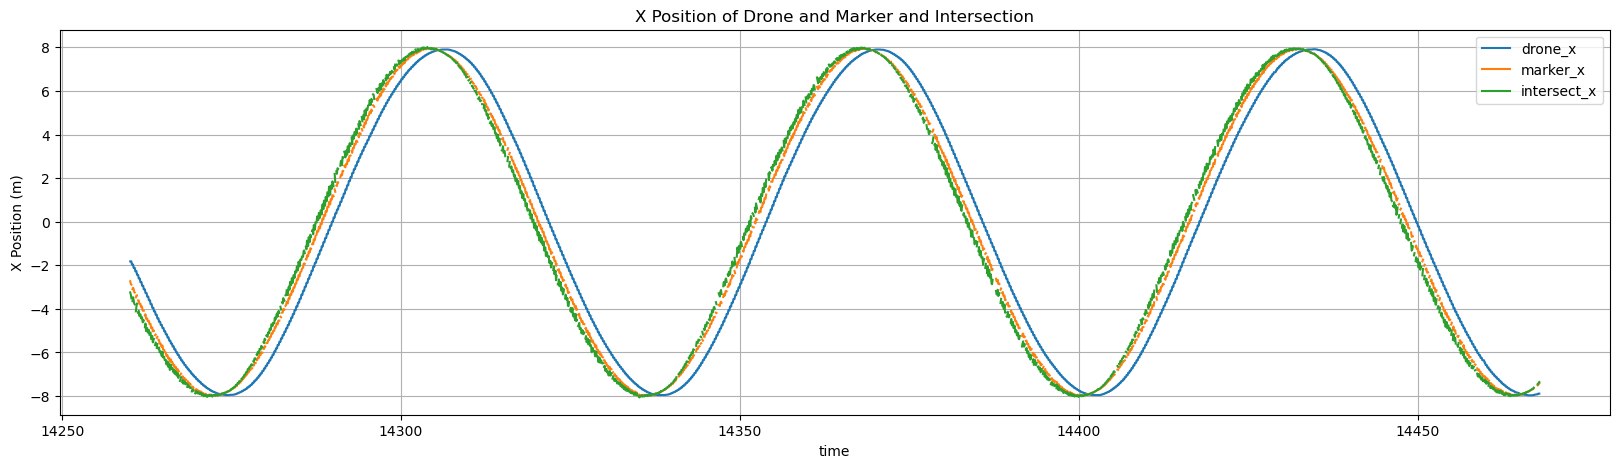

In [1034]:
# plot Drone_State_1 and Marker_State_1 together over time
iris_data[['drone_x', 'marker_x', 'intersect_x']].plot(figsize=(20,5))
plt.grid()
plt.title('X Position of Drone and Marker and Intersection')
plt.ylabel('X Position (m)')

Text(0, 0.5, 'Y Position (m)')

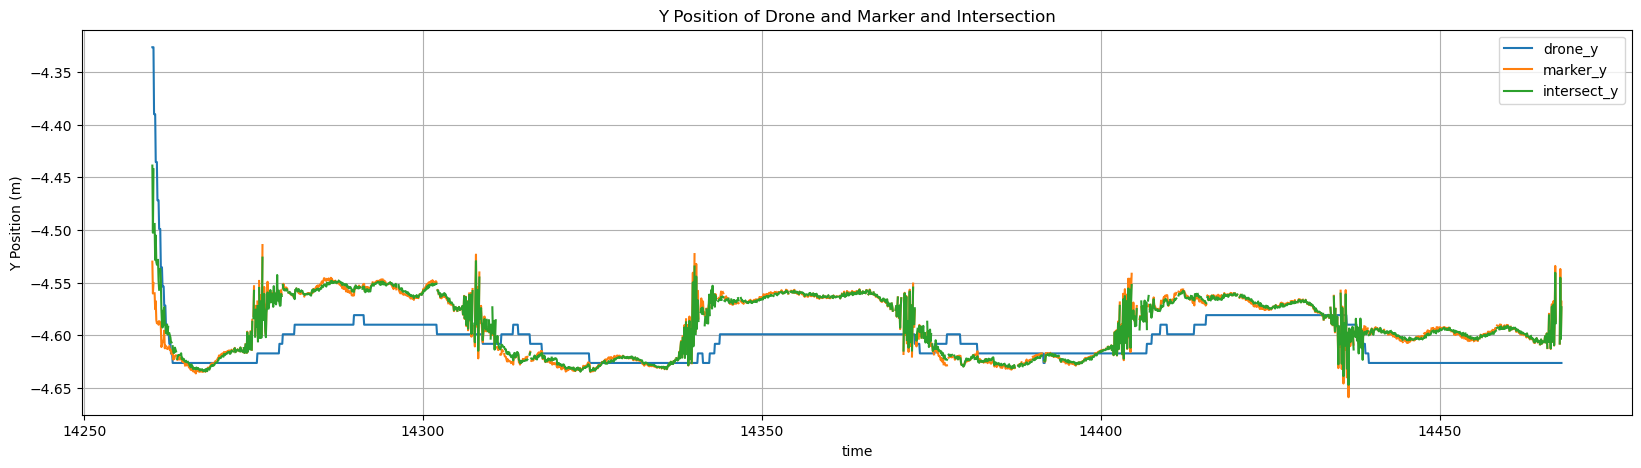

In [1035]:
# plot Drone_State_1 and Marker_State_1 together over time
iris_data[['drone_y', 'marker_y', 'intersect_y']].plot(figsize=(20,5))
plt.grid()
plt.title('Y Position of Drone and Marker and Intersection')
plt.ylabel('Y Position (m)')

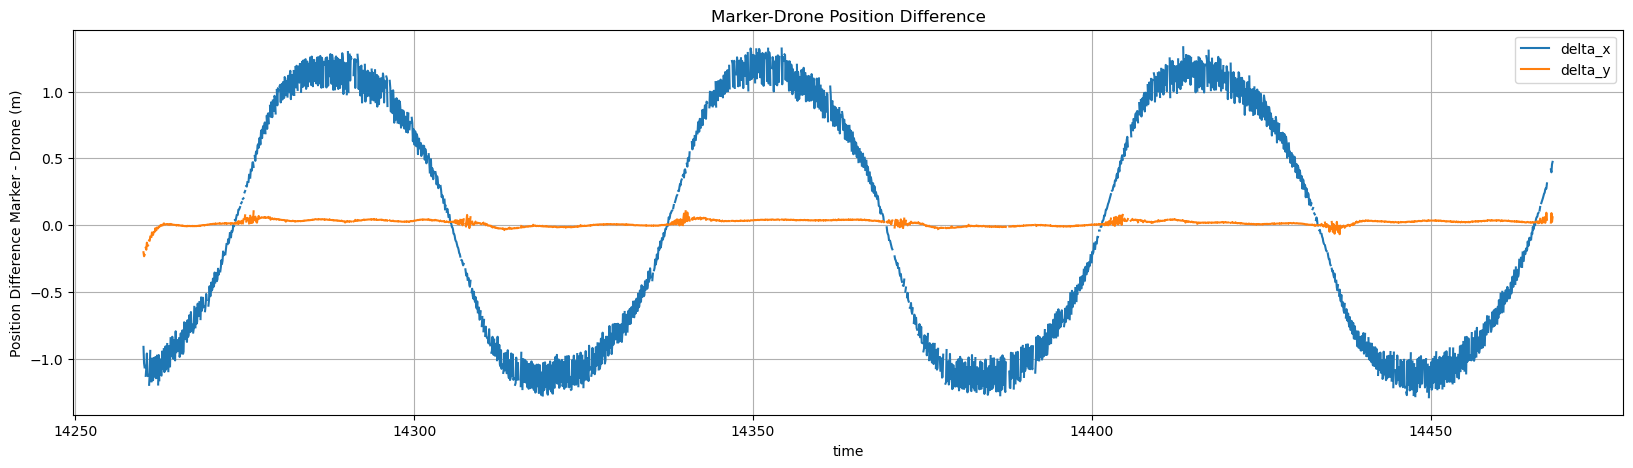

In [1036]:
# plot the difference between the marker and drone positions
(iris_data['marker_x']-iris_data['drone_x']).plot(figsize=(20,5))
(iris_data['marker_y']-iris_data['drone_y']).plot(figsize=(20,5))
plt.legend(['delta_x', 'delta_y'])
plt.title('Marker-Drone Position Difference')
plt.ylabel('Position Difference Marker - Drone (m)')
plt.grid()

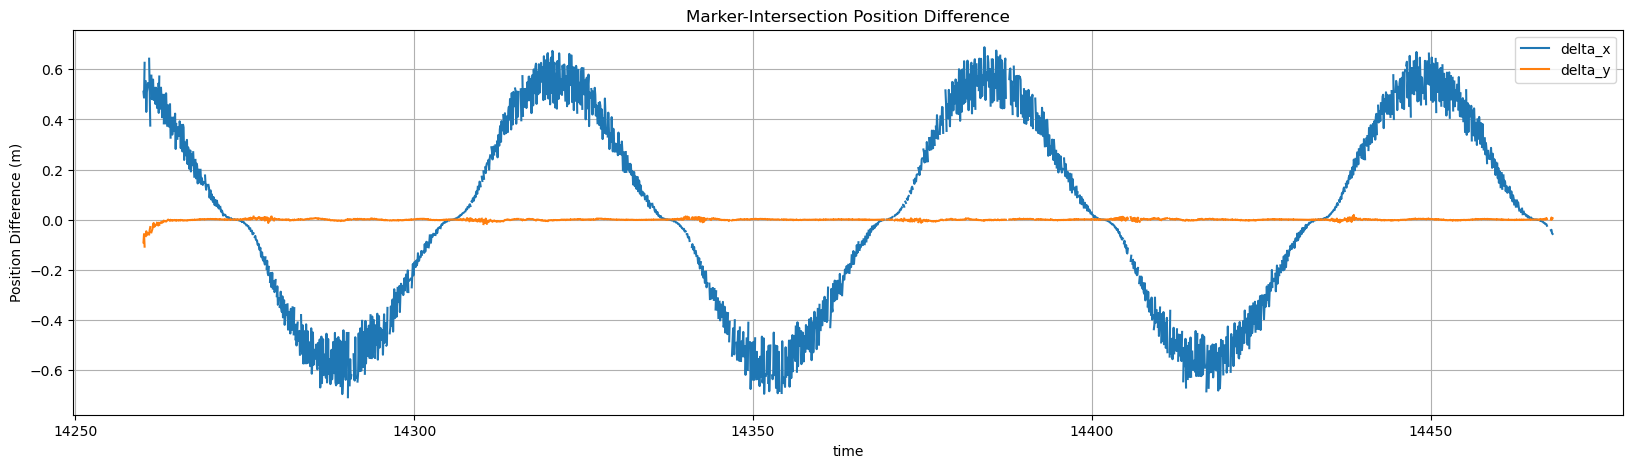

In [1037]:
# plot the difference between the marker and drone positions
(iris_data['marker_x']-iris_data['intersect_x']).plot(figsize=(20,5))
(iris_data['marker_y']-iris_data['intersect_y']).plot(figsize=(20,5))
plt.legend(['delta_x', 'delta_y'])
plt.title('Marker-Intersection Position Difference')
plt.ylabel('Position Difference (m)')
plt.grid()

Text(0, 0.5, 'Speed (m/s)')

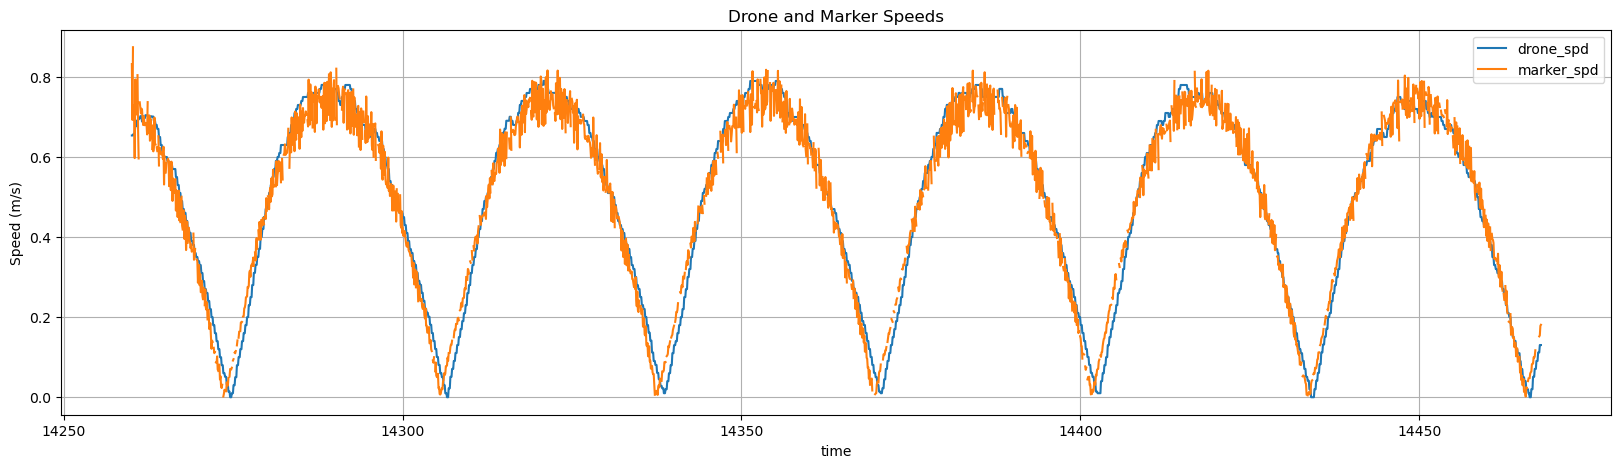

In [1038]:

# plot marker velocity and drone velocity
iris_data[['drone_spd', 'marker_spd']].plot(figsize=(20,5))
plt.grid()
plt.title('Drone and Marker Speeds')
plt.ylabel('Speed (m/s)')

Text(0, 0.5, 'Heading (deg)')

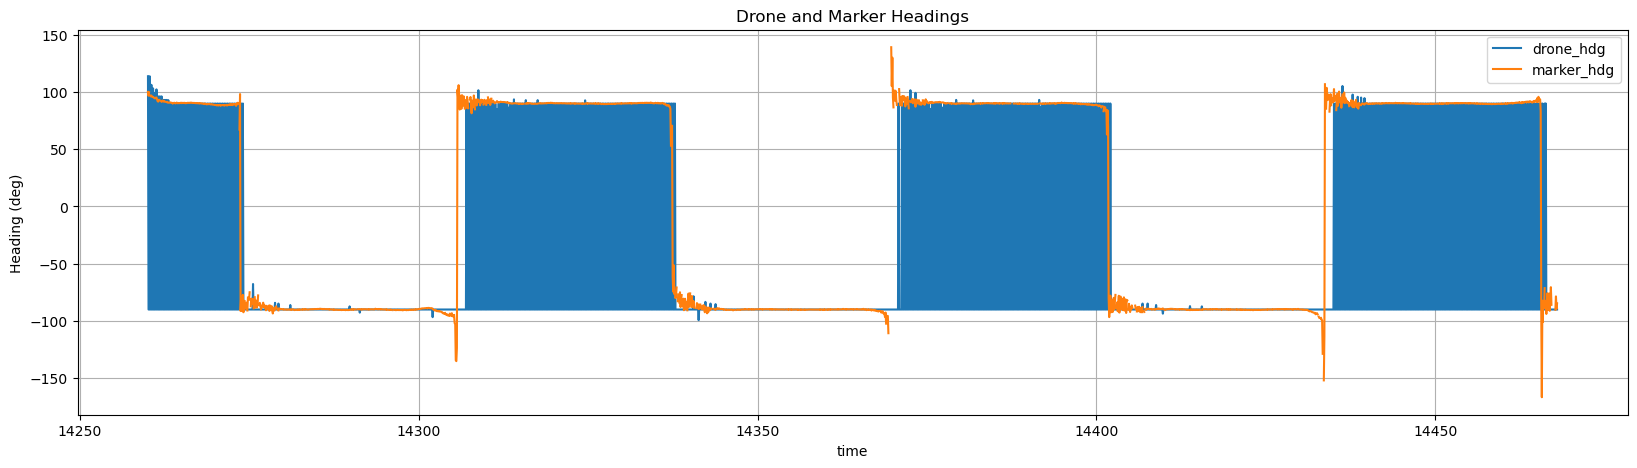

In [1039]:
# plot marker heading and drone heading
iris_data[['drone_hdg', 'marker_hdg']].plot(figsize=(20,5))
plt.grid()
plt.title('Drone and Marker Headings')
plt.ylabel('Heading (deg)')

/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_78627/1965883219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['drone_mode_int'] = iris_data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 3 if x == 'Targeting' else 2)


Text(0.5, 1.0, 'Drone Mode')

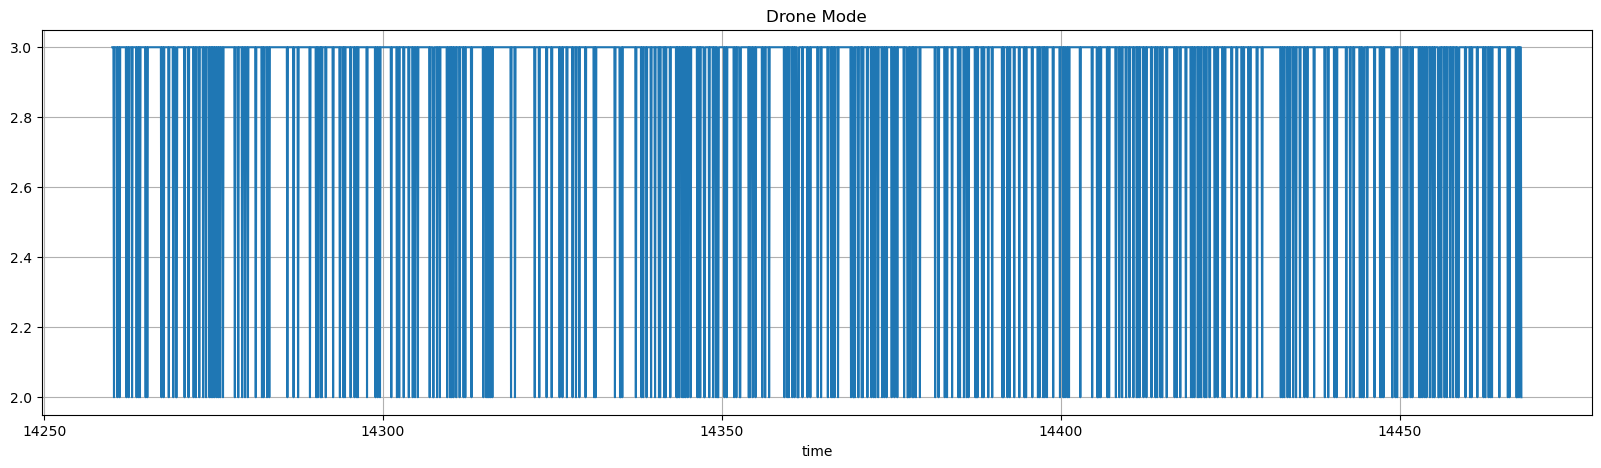

In [1040]:
iris_data['drone_mode_int'] = iris_data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 3 if x == 'Targeting' else 2)
iris_data['drone_mode_int'].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Mode')

Text(0, 0.5, 'Acceleration (m/s^2)')

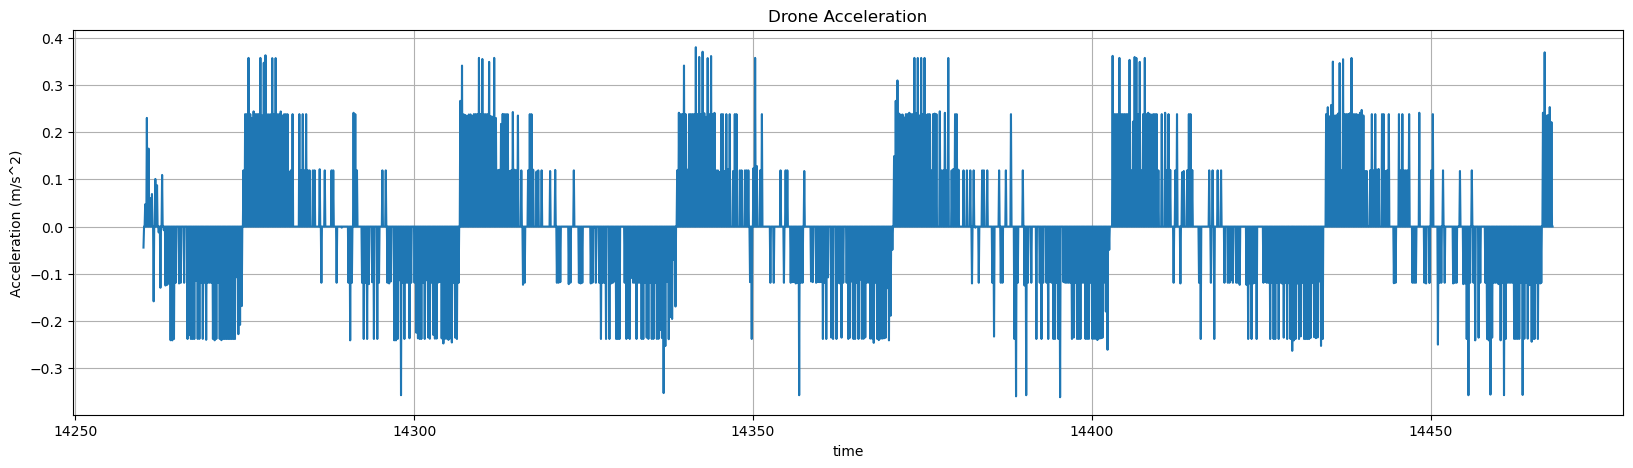

In [1041]:
# plot drone acceleration
iris_data['drone_acc'].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Acceleration')
plt.ylabel('Acceleration (m/s^2)')

Text(0, 0.5, 'Angle (deg)')

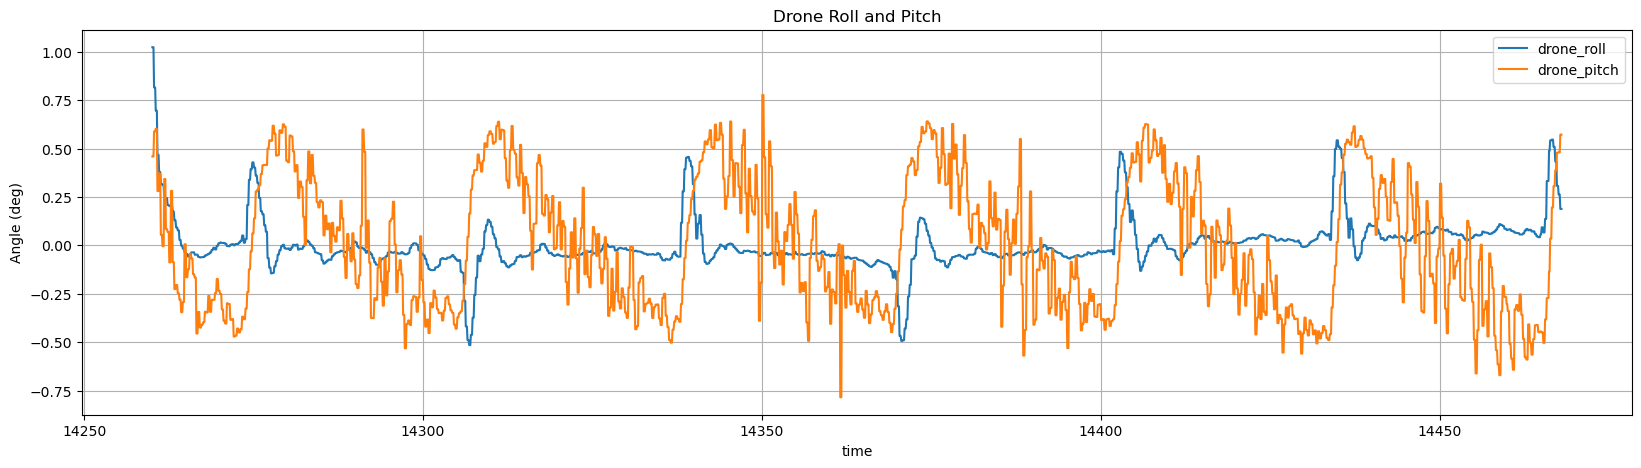

In [1042]:
# plot drone roll, pitch, and yaw
iris_data[['drone_roll', 'drone_pitch']].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Roll and Pitch')
plt.ylabel('Angle (deg)')

Text(0, 0.5, 'Speed (m/s)')

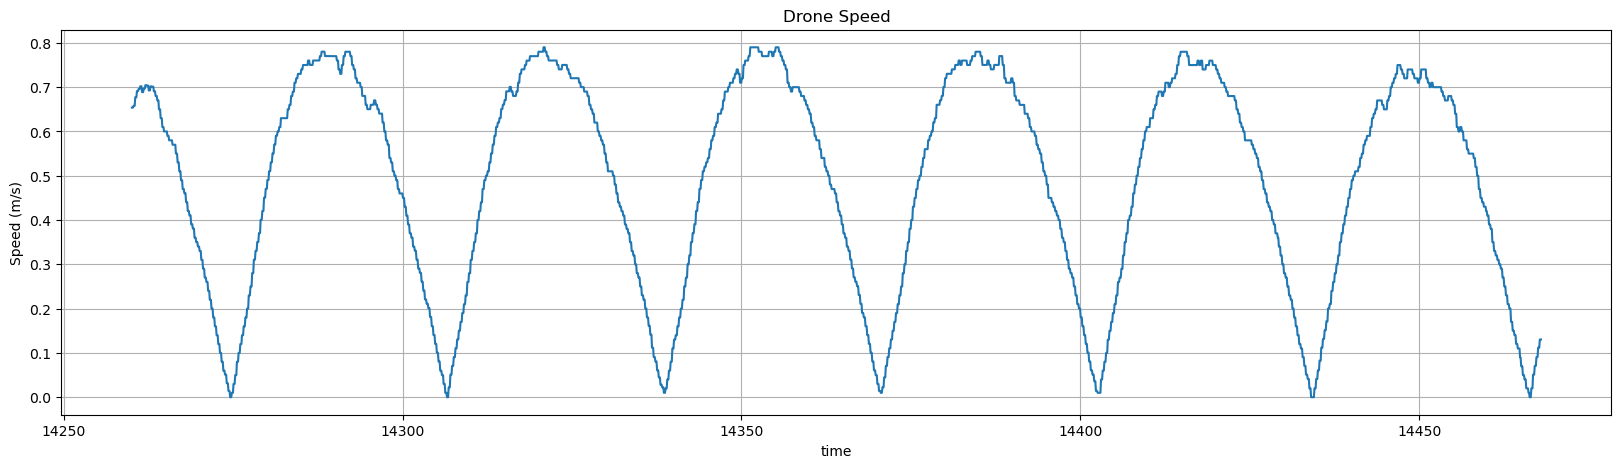

In [1043]:
iris_data['drone_spd'].plot(figsize=(20,5))
plt.grid()
plt.title('Drone Speed')
plt.ylabel('Speed (m/s)')

/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_78627/309686773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['distance_to_marker'] = ((iris_data['marker_x']-iris_data['drone_x'])**2 + (iris_data['marker_y']-iris_data['drone_y'])**2)**0.5
/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_78627/309686773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['distance_to_intersect'] = ((iris_data['intersect_x']-iris_data['drone_x'])**2 + (iris_data['intersect_y']-ir

Text(0, 0.5, 'Distance (m)')

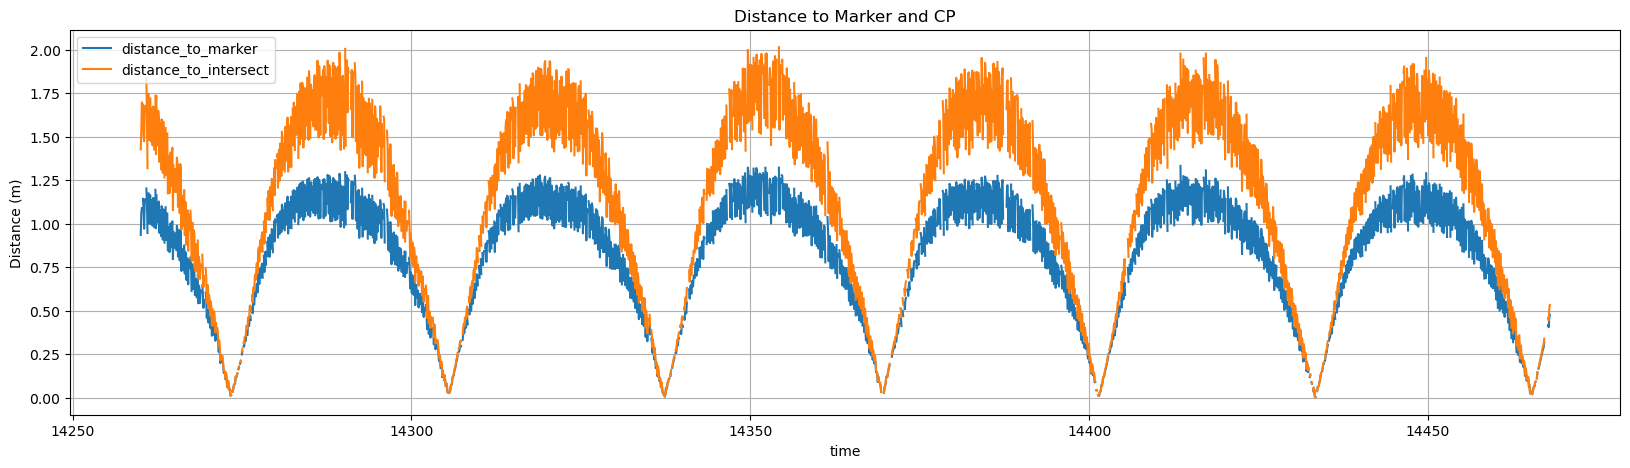

In [1044]:
# plot distance to marker
iris_data['distance_to_marker'] = ((iris_data['marker_x']-iris_data['drone_x'])**2 + (iris_data['marker_y']-iris_data['drone_y'])**2)**0.5
iris_data['distance_to_marker'].plot(figsize=(20,5))
iris_data['distance_to_intersect'] = ((iris_data['intersect_x']-iris_data['drone_x'])**2 + (iris_data['intersect_y']-iris_data['drone_y'])**2)**0.5
iris_data['distance_to_intersect'].plot(figsize=(20,5))
plt.grid()
plt.legend(['distance_to_marker', 'distance_to_intersect'])
plt.title('Distance to Marker and CP')
plt.ylabel('Distance (m)')

## GAZEBO STATE

In [1087]:
import yaml

with open(get_latest_log_file('gzstate'), 'r') as file:
    gzstate = yaml.safe_load(file)
    
gzstate

Reading log file: gzstate_2024-01-31_07-40-52.yaml


{14252.173: {'iris_pos': [-0.039, 4.611, 2.891],
  'iris_ori': [0, 0, -0.71, 0.704],
  'iris_acc': [-0.003, -0.002, -0.001],
  'iris_tor': [-0.001, 0, 0],
  'marker_4_pos': [-2.829, 4.57, 0.03],
  'marker_4_ori': [0, 0, 0, 1],
  'marker_4_acc': [0, 0, 0],
  'marker_4_tor': [0, 0, 0]},
 14252.215: {'iris_pos': [-0.039, 4.611, 2.891],
  'iris_ori': [0, 0, -0.71, 0.704],
  'iris_acc': [-0.003, -0.002, -0.001],
  'iris_tor': [-0.001, 0.003, 0],
  'marker_4_pos': [-2.805, 4.57, 0.03],
  'marker_4_ori': [0, 0, 0, 1],
  'marker_4_acc': [0, 0, 0],
  'marker_4_tor': [0, 0, 0]},
 14252.257: {'iris_pos': [-0.039, 4.61, 2.891],
  'iris_ori': [0, 0, -0.71, 0.704],
  'iris_acc': [-0.003, -0.002, -0.001],
  'iris_tor': [-0.001, 0.002, 0],
  'marker_4_pos': [-2.757, 4.57, 0.03],
  'marker_4_ori': [0, 0, 0, 1],
  'marker_4_acc': [0, 0, 0],
  'marker_4_tor': [0, 0, 0]},
 14252.299: {'iris_pos': [-0.039, 4.61, 2.891],
  'iris_ori': [0, 0, -0.71, 0.704],
  'iris_acc': [-0.004, -0.002, -0.001],
  'iris_tor

In [1088]:
df_gzstate = pd.DataFrame(gzstate).T
df_gzstate = df_gzstate[START_TIME:]
df_gzstate

iris_pos                          iris_ori  \
14260.007  [1.852, 4.332, 0.961]  [-0.009, -0.005, -0.058, -0.998]   
14260.049  [1.876, 4.341, 0.962]  [-0.008, -0.005, -0.053, -0.999]   
14260.090     [1.9, 4.35, 0.962]  [-0.008, -0.005, -0.049, -0.999]   
14260.132  [1.925, 4.358, 0.962]  [-0.008, -0.005, -0.045, -0.999]   
14260.174   [1.95, 4.366, 0.963]  [-0.008, -0.005, -0.039, -0.999]   
...                          ...                               ...   
14467.799  [7.904, 4.612, 0.975]    [0.005, -0.001, -0.996, 0.087]   
14467.840  [7.899, 4.612, 0.975]    [0.005, -0.001, -0.997, 0.072]   
14467.882  [7.893, 4.611, 0.975]         [0.005, 0, -0.998, 0.061]   
14467.924  [7.887, 4.611, 0.975]         [0.005, 0, -0.999, 0.052]   
14467.965   [7.882, 4.61, 0.975]         [0.005, 0, -0.999, 0.045]   

                          iris_acc                  iris_tor  \
14260.007    [0.586, 0.221, 0.008]   [-0.016, 0.014, -0.181]   
14260.049     [0.59, 0.214, 0.008]    [-0.015, 0.025, -0.23]   
14260.090    [0.594, 0.208, 0.008]   [-0.011, 0.013, -0.187]   
14260.132    [0.598, 0.201, 0.008]  [-0.011, -0.014, -0.297]   
14260.174    [0.603, 0.195, 0.008]  [-0.028, -0.011, -0.222]   
...                            ...                       ...   
14467.799  [-0.128, -0.013, 0.002]   [0.008, -0.001, -0.755]   
14467.840  [-0.132, -0.013, 0.002]        [0.029, 0, -0.664]   
14467.882  [-0.136, -0.012, 0.002]    [0.009, 0.002, -0.493]   
14467.924   [-0.14, -0.012, 0.002]  [-0.009, -0.002, -0.324]   
14467.965  [-0.144, -0.012, 0.003]  [-0.003, -0.009, -0.365]   

                  marker_4_pos  marker_4_ori marker_4_acc marker_4_tor  
14260.007  [2.919, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14260.049  [2.967, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14260.090  [2.991, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14260.132  [3.015, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14260.174  [3.039, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
...                        ...           ...          ...          ...  
14467.799  [7.382, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14467.840  [7.372, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14467.882  [7.361, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14467.924  [7.339, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  
14467.965  [7.328, 4.57, 0.03]  [0, 0, 0, 1]    [0, 0, 0]    [0, 0, 0]  

[4992 rows x 8 columns]

In [1089]:
# unpack raw data
df_gzstate[['drone_x','drone_y','drone_z']] = df_gzstate['iris_pos'].apply(pd.Series)
df_gzstate.drop(columns=['iris_pos'], inplace=True)
df_gzstate[['marker_x','marker_y','marker_z']] = df_gzstate['marker_4_pos'].apply(pd.Series)
df_gzstate.drop(columns=['marker_4_pos'], inplace=True)

# unpack acceleration for drone
df_gzstate[['drone_acc_x', 'drone_acc_y', 'drone_acc_z']] = df_gzstate['iris_acc'].apply(pd.Series)
df_gzstate.drop(columns=['iris_acc'], inplace=True)
df_gzstate['drone_acc'] = (df_gzstate['drone_acc_x']**2 + df_gzstate['drone_acc_y']**2 + df_gzstate['drone_acc_z']**2)**0.5

# unpack acceleration for marker
df_gzstate[['marker_acc_x', 'marker_acc_y', 'marker_acc_z']] = df_gzstate['marker_4_acc'].apply(pd.Series)
df_gzstate.drop(columns=['marker_4_acc'], inplace=True)
df_gzstate['marker_acc'] = (df_gzstate['marker_acc_x']**2 + df_gzstate['marker_acc_y']**2 + df_gzstate['marker_acc_z']**2)**0.5

# unpack orientation for drone
df_gzstate[['drone_quarterion_x', 'drone_quarterion_y', 'drone_quarterion_z', 'drone_quarterion_w']] = df_gzstate['iris_ori'].apply(pd.Series)
df_gzstate['drone_yaw'] = np.arctan2(2.0*(df_gzstate['drone_quarterion_y']*df_gzstate['drone_quarterion_w'] + df_gzstate['drone_quarterion_x']*df_gzstate['drone_quarterion_z']), 1.0 - 2.0*(df_gzstate['drone_quarterion_y']*df_gzstate['drone_quarterion_y'] + df_gzstate['drone_quarterion_z']*df_gzstate['drone_quarterion_z']))
df_gzstate['drone_pitch'] = np.arcsin(2.0*(df_gzstate['drone_quarterion_x']*df_gzstate['drone_quarterion_y'] + df_gzstate['drone_quarterion_z']*df_gzstate['drone_quarterion_w']))
df_gzstate['drone_roll'] = np.arctan2(2.0*(df_gzstate['drone_quarterion_x']*df_gzstate['drone_quarterion_w'] + df_gzstate['drone_quarterion_y']*df_gzstate['drone_quarterion_z']), 1.0 - 2.0*(df_gzstate['drone_quarterion_x']*df_gzstate['drone_quarterion_x'] + df_gzstate['drone_quarterion_y']*df_gzstate['drone_quarterion_y']))
df_gzstate.drop(columns=['drone_quarterion_x', 'drone_quarterion_y', 'drone_quarterion_z', 'drone_quarterion_w', 'iris_ori'], inplace=True)

# unpack orientation for marker
df_gzstate[['marker_quarterion_x', 'marker_quarterion_y', 'marker_quarterion_z', 'marker_quarterion_w']] = df_gzstate['marker_4_ori'].apply(pd.Series)
df_gzstate['marker_yaw'] = np.arctan2(2.0*(df_gzstate['marker_quarterion_y']*df_gzstate['marker_quarterion_w'] + df_gzstate['marker_quarterion_x']*df_gzstate['marker_quarterion_z']), 1.0 - 2.0*(df_gzstate['marker_quarterion_y']*df_gzstate['marker_quarterion_y'] + df_gzstate['marker_quarterion_z']*df_gzstate['marker_quarterion_z']))
df_gzstate['marker_pitch'] = np.arcsin(2.0*(df_gzstate['marker_quarterion_x']*df_gzstate['marker_quarterion_y'] + df_gzstate['marker_quarterion_z']*df_gzstate['marker_quarterion_w']))
df_gzstate['marker_roll'] = np.arctan2(2.0*(df_gzstate['marker_quarterion_x']*df_gzstate['marker_quarterion_w'] + df_gzstate['marker_quarterion_y']*df_gzstate['marker_quarterion_z']), 1.0 - 2.0*(df_gzstate['marker_quarterion_x']*df_gzstate['marker_quarterion_x'] + df_gzstate['marker_quarterion_y']*df_gzstate['marker_quarterion_y']))
df_gzstate.drop(columns=['marker_quarterion_x', 'marker_quarterion_y', 'marker_quarterion_z', 'marker_quarterion_w', 'marker_4_ori'], inplace=True)

# make sure yaw, roll, and pitch are in degrees
df_gzstate['drone_yaw'] = (np.rad2deg(df_gzstate['drone_yaw']) + HEADING_OFFSET + 180) % 360 - 180
df_gzstate['drone_pitch'] = (np.rad2deg(df_gzstate['drone_pitch']) + 180) % 360 - 180
df_gzstate['drone_roll'] = (np.rad2deg(df_gzstate['drone_roll']) + 180) % 360 - 180
df_gzstate['marker_yaw'] = (np.rad2deg(df_gzstate['marker_yaw']) + HEADING_OFFSET + 180) % 360 - 180
df_gzstate['marker_pitch'] = (np.rad2deg(df_gzstate['marker_pitch']) + 180) % 360 - 180
df_gzstate['marker_roll'] = (np.rad2deg(df_gzstate['marker_roll']) + 180) % 360 - 180

# flip sign of x and y of drone
df_gzstate['drone_x'] = -df_gzstate['drone_x']
df_gzstate['drone_y'] = -df_gzstate['drone_y']

# flip sign of x and y of marker
df_gzstate['marker_x'] = -df_gzstate['marker_x']
df_gzstate['marker_y'] = -df_gzstate['marker_y']

/Users/phan/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1090]:
# calculate velocity of drone
df_gzstate['drone_vel_x'] = df_gzstate['drone_x'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['drone_vel_y'] = df_gzstate['drone_y'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['drone_vel_z'] = df_gzstate['drone_z'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['drone_spd'] = (df_gzstate['drone_vel_x']**2 + df_gzstate['drone_vel_y']**2 + df_gzstate['drone_vel_z']**2)**0.5

# calculate velocity of marker
df_gzstate['marker_vel_x'] = df_gzstate['marker_x'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['marker_vel_y'] = df_gzstate['marker_y'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['marker_vel_z'] = df_gzstate['marker_z'].diff() / df_gzstate.index.to_series().diff()
df_gzstate['marker_spd'] = (df_gzstate['marker_vel_x']**2 + df_gzstate['marker_vel_y']**2 + df_gzstate['marker_vel_z']**2)**0.5

# calculate marker heading using its velocity (x,y) and tangent
df_gzstate['marker_hdg'] = (np.degrees(np.arctan2(df_gzstate['marker_vel_y'], df_gzstate['marker_vel_x'])) + HEADING_OFFSET + 180) % 360 - 180 

# calculate drone heading using its velocity (x,y) and tangent
df_gzstate['drone_hdg'] = (np.degrees(np.arctan2(df_gzstate['drone_vel_y'], df_gzstate['drone_vel_x'])) + HEADING_OFFSET + 180) % 360 - 180

df_gzstate

iris_tor marker_4_tor  drone_x  drone_y  drone_z  \
14260.007   [-0.016, 0.014, -0.181]    [0, 0, 0]   -1.852   -4.332    0.961   
14260.049    [-0.015, 0.025, -0.23]    [0, 0, 0]   -1.876   -4.341    0.962   
14260.090   [-0.011, 0.013, -0.187]    [0, 0, 0]   -1.900   -4.350    0.962   
14260.132  [-0.011, -0.014, -0.297]    [0, 0, 0]   -1.925   -4.358    0.962   
14260.174  [-0.028, -0.011, -0.222]    [0, 0, 0]   -1.950   -4.366    0.963   
...                             ...          ...      ...      ...      ...   
14467.799   [0.008, -0.001, -0.755]    [0, 0, 0]   -7.904   -4.612    0.975   
14467.840        [0.029, 0, -0.664]    [0, 0, 0]   -7.899   -4.612    0.975   
14467.882    [0.009, 0.002, -0.493]    [0, 0, 0]   -7.893   -4.611    0.975   
14467.924  [-0.009, -0.002, -0.324]    [0, 0, 0]   -7.887   -4.611    0.975   
14467.965  [-0.003, -0.009, -0.365]    [0, 0, 0]   -7.882   -4.610    0.975   

           marker_x  marker_y  marker_z  drone_acc_x  drone_acc_y  ...  \
14260.007    -2.919     -4.57      0.03        0.586        0.221  ...   
14260.049    -2.967     -4.57      0.03        0.590        0.214  ...   
14260.090    -2.991     -4.57      0.03        0.594        0.208  ...   
14260.132    -3.015     -4.57      0.03        0.598        0.201  ...   
14260.174    -3.039     -4.57      0.03        0.603        0.195  ...   
...             ...       ...       ...          ...          ...  ...   
14467.799    -7.382     -4.57      0.03       -0.128       -0.013  ...   
14467.840    -7.372     -4.57      0.03       -0.132       -0.013  ...   
14467.882    -7.361     -4.57      0.03       -0.136       -0.012  ...   
14467.924    -7.339     -4.57      0.03       -0.140       -0.012  ...   
14467.965    -7.328     -4.57      0.03       -0.144       -0.012  ...   

           drone_vel_x  drone_vel_y  drone_vel_z  drone_spd  marker_vel_x  \
14260.007          NaN          NaN          NaN        NaN           NaN   
14260.049    -0.571429    -0.214286      0.02381   0.610750     -1.142857   
14260.090    -0.585366    -0.219512      0.00000   0.625171     -0.585366   
14260.132    -0.595238    -0.190476      0.00000   0.624972     -0.571429   
14260.174    -0.595238    -0.190476      0.02381   0.625425     -0.571429   
...                ...          ...          ...        ...           ...   
14467.799     0.119048     0.023810      0.00000   0.121405      0.261905   
14467.840     0.121951     0.000000      0.00000   0.121951      0.243902   
14467.882     0.142857     0.023810      0.00000   0.144828      0.261905   
14467.924     0.142857     0.000000      0.00000   0.142857      0.523810   
14467.965     0.121951     0.024390      0.00000   0.124366      0.268293   

           marker_vel_y  marker_vel_z  marker_spd  marker_hdg   drone_hdg  
14260.007           NaN           NaN         NaN         NaN         NaN  
14260.049           0.0           0.0    1.142857        90.0  110.556045  
14260.090           0.0           0.0    0.585366        90.0  110.556045  
14260.132           0.0           0.0    0.571429        90.0  107.744672  
14260.174           0.0           0.0    0.571429        90.0  107.744672  
...                 ...           ...         ...         ...         ...  
14467.799           0.0           0.0    0.261905       -90.0  -78.690068  
14467.840           0.0           0.0    0.243902       -90.0  -90.000000  
14467.882           0.0           0.0    0.261905       -90.0  -80.537678  
14467.924           0.0           0.0    0.523810       -90.0  -90.000000  
14467.965           0.0           0.0    0.268293       -90.0  -78.690068  

[4992 rows x 32 columns]

In [1091]:
df_gzstate.keys()

Index(['iris_tor', 'marker_4_tor', 'drone_x', 'drone_y', 'drone_z', 'marker_x',
       'marker_y', 'marker_z', 'drone_acc_x', 'drone_acc_y', 'drone_acc_z',
       'drone_acc', 'marker_acc_x', 'marker_acc_y', 'marker_acc_z',
       'marker_acc', 'drone_yaw', 'drone_pitch', 'drone_roll', 'marker_yaw',
       'marker_pitch', 'marker_roll', 'drone_vel_x', 'drone_vel_y',
       'drone_vel_z', 'drone_spd', 'marker_vel_x', 'marker_vel_y',
       'marker_vel_z', 'marker_spd', 'marker_hdg', 'drone_hdg'],
      dtype='object')

In [1092]:
# everytime df_gzstate['marker_x'] hit 8 or -8, plot a vertical line
target: float = 8.0
tolerance: float = 0.001
threshold: float = target - tolerance
turnpoints = df_gzstate['marker_x'].apply(lambda x: 1 if x >= threshold else -1 if x <= -threshold else 0)
turnpoints = turnpoints[(turnpoints == 1) | (turnpoints == -1)]

# for each turnpoint, plot a vertical line
# don't want to plot turnpoints that are too close to each other
def draw_turnpoint_lines():
    current_turnpoint_time = 0
    for turnpoint_time in turnpoints.index:
        if turnpoint_time - current_turnpoint_time < 2:
            continue
        current_turnpoint_time = turnpoint_time
        if turnpoints[turnpoint_time] == 1:
            # South, x = +8
            # plt.text(turnpoint_time+.3, 0, ' + 8', color='black', alpha=1)
            plt.axvline(turnpoint_time, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
            
        elif turnpoints[turnpoint_time] == -1:
            # North, x = -8
            # plt.text(turnpoint_time+.3, 0, ' - 8', color='black', alpha=1)
            plt.axvline(turnpoint_time, color='black', linestyle='--', linewidth=1, alpha=0.5)
            

Text(0, 0.5, 'X Position (m)')

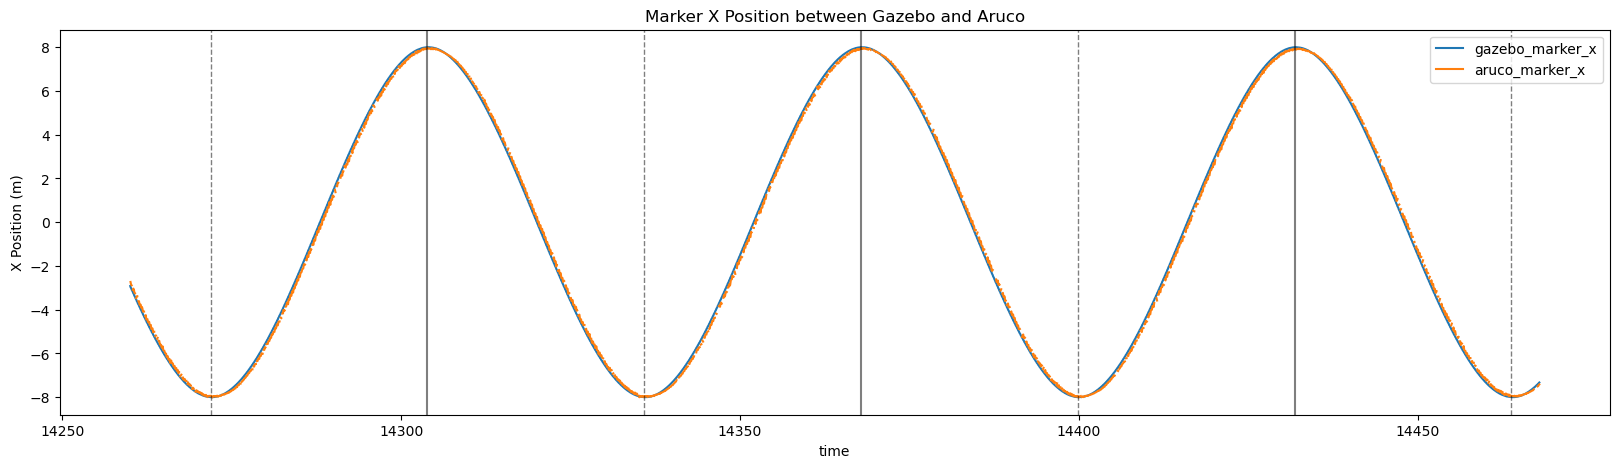

In [1093]:
df_gzstate['marker_x'].plot(figsize=(20,5))
iris_data['marker_x'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_x', 'aruco_marker_x'])
plt.title('Marker X Position between Gazebo and Aruco')
plt.ylabel('X Position (m)')

Text(0, 0.5, 'Y Position (m)')

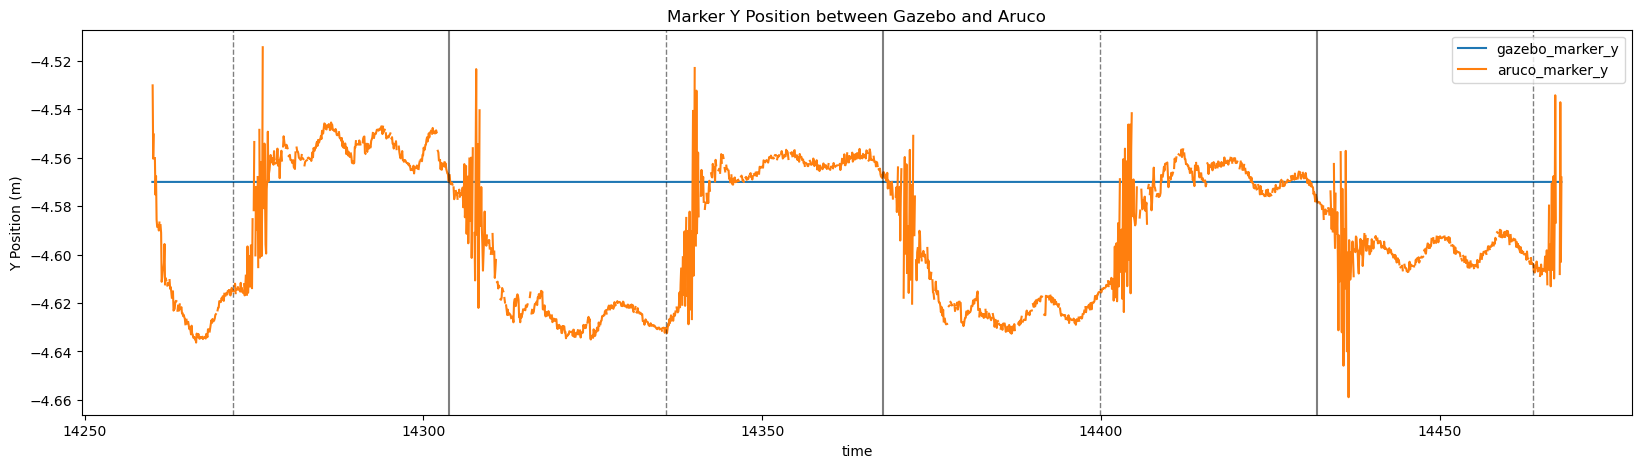

In [1094]:
df_gzstate['marker_y'].plot(figsize=(20,5))
iris_data['marker_y'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_y', 'aruco_marker_y'])
plt.title('Marker Y Position between Gazebo and Aruco')
plt.ylabel('Y Position (m)')

Reading log file: c5_2024-01-31_07-40-51.yaml


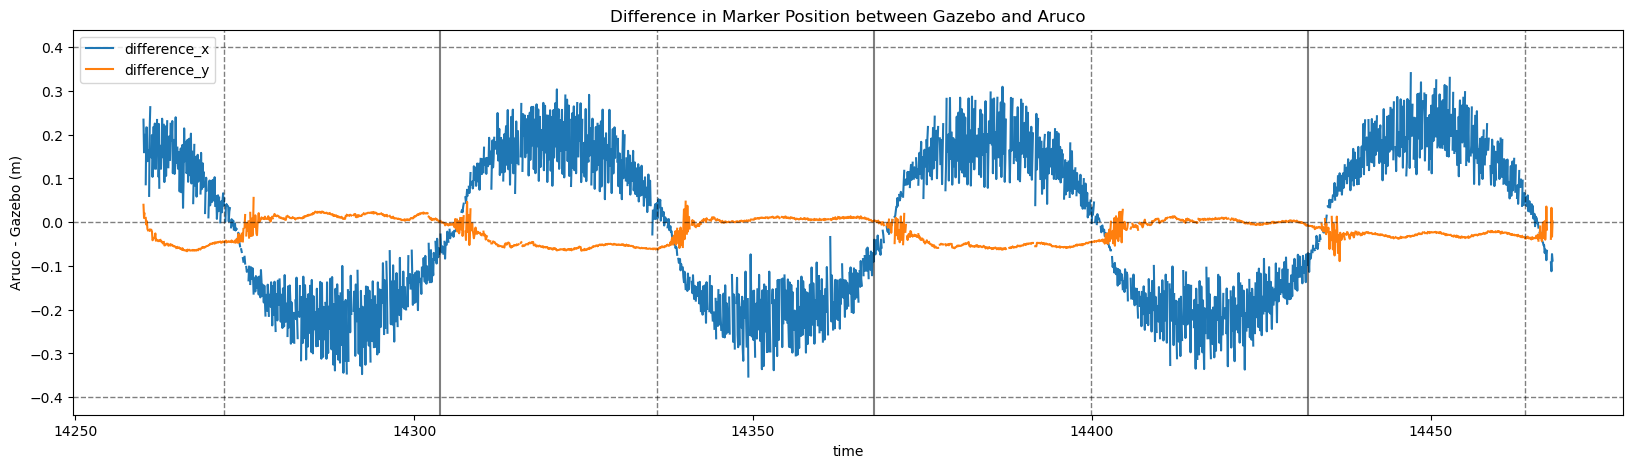

In [1095]:
# culculate delta_x and delta_y between gzstate and aruco
gazebo_marker_x = df_gzstate['marker_x']
gazebo_marker_y = df_gzstate['marker_y']

# reindex gazebo_marker_x and gazebo_marker_y to match the index of iris_data (for easy calculation of difference)
gazebo_marker_x = gazebo_marker_x.reindex(iris_data.index, method='nearest')
gazebo_marker_y = gazebo_marker_y.reindex(iris_data.index, method='nearest')

# delta_x between gazebo and aruco
delta_x = iris_data['marker_x'] - gazebo_marker_x
delta_y = iris_data['marker_y'] - gazebo_marker_y 

# plot delta_x and delta_y
delta_x.plot(figsize=(20,5))
delta_y.plot(figsize=(20,5))
    
# draw a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

draw_turnpoint_lines()

# plt.grid()
plt.legend(['difference_x', 'difference_y'])
plt.title('Difference in Marker Position between Gazebo and Aruco')
plt.ylabel('Aruco - Gazebo (m)')

# draw a horizontal line at y=0.4 and -0.4
plt.axhline(0.4, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.axhline(-0.4, color='black', linestyle='--', linewidth=1, alpha=0.5)


# get the current time

# save the plot with time as the file name
file_name = get_latest_log_file('c5').rsplit('/',1)[-1].strip('.yaml')
plt.savefig(f'./figures/{file_name}-difference_in_marker_position.png', dpi=300, bbox_inches='tight')

Insight: The graph above shows the drone always think the marker closer to it than the marker actually is. This leads to the drone always trailing behind the marker.

Text(0, 0.5, 'Pitch Angle (deg)')

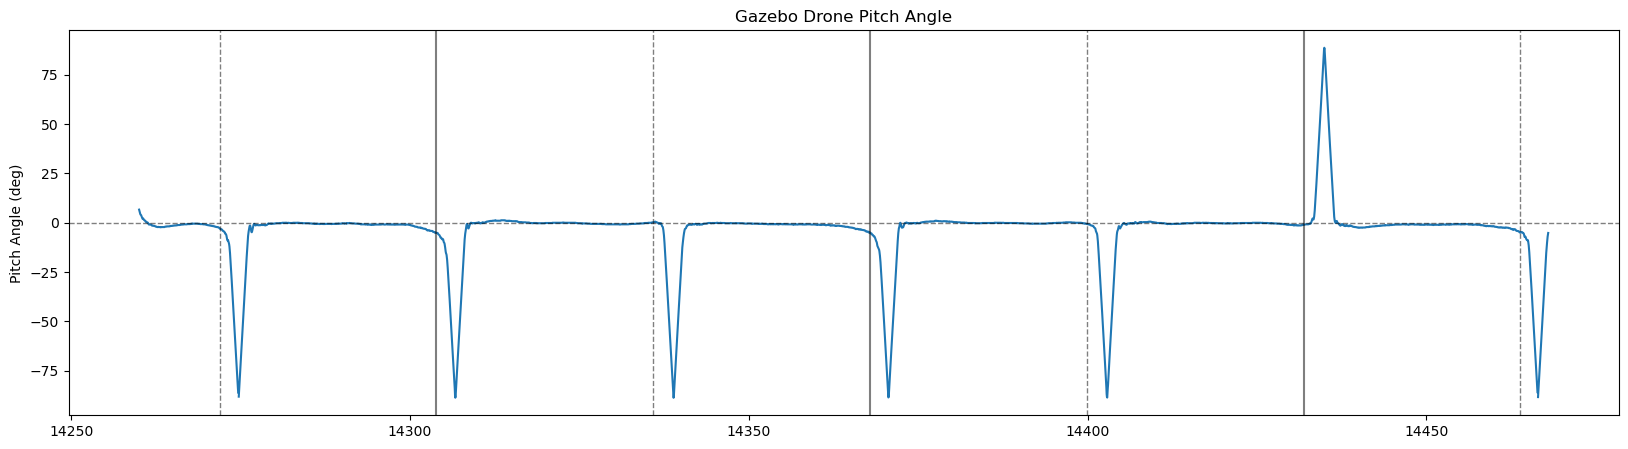

In [1096]:
# print out pitch angle of the drone using the gazebo data
df_gzstate['drone_pitch'].plot(figsize=(20,5))
draw_turnpoint_lines()
# draw a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.title('Gazebo Drone Pitch Angle')
plt.ylabel('Pitch Angle (deg)')

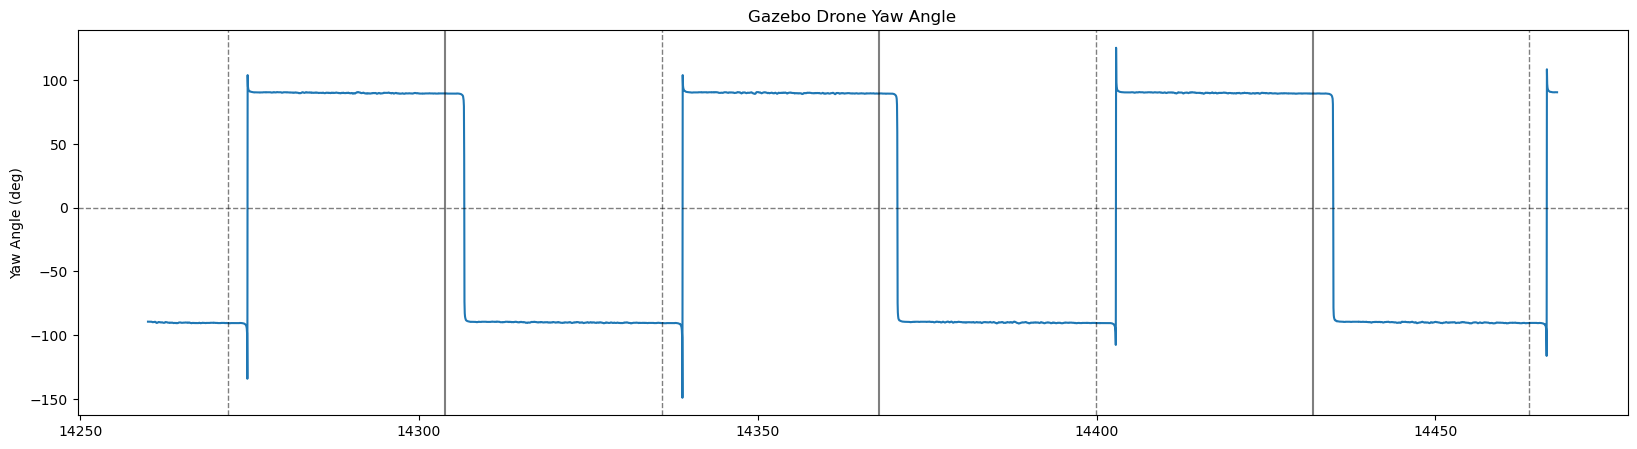

In [1112]:
# print out yaw angle of the drone using the gazebo data
df_gzstate['drone_yaw'].plot(figsize=(20,5))
draw_turnpoint_lines()
# draw a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.title('Gazebo Drone Yaw Angle')
plt.ylabel('Yaw Angle (deg)');

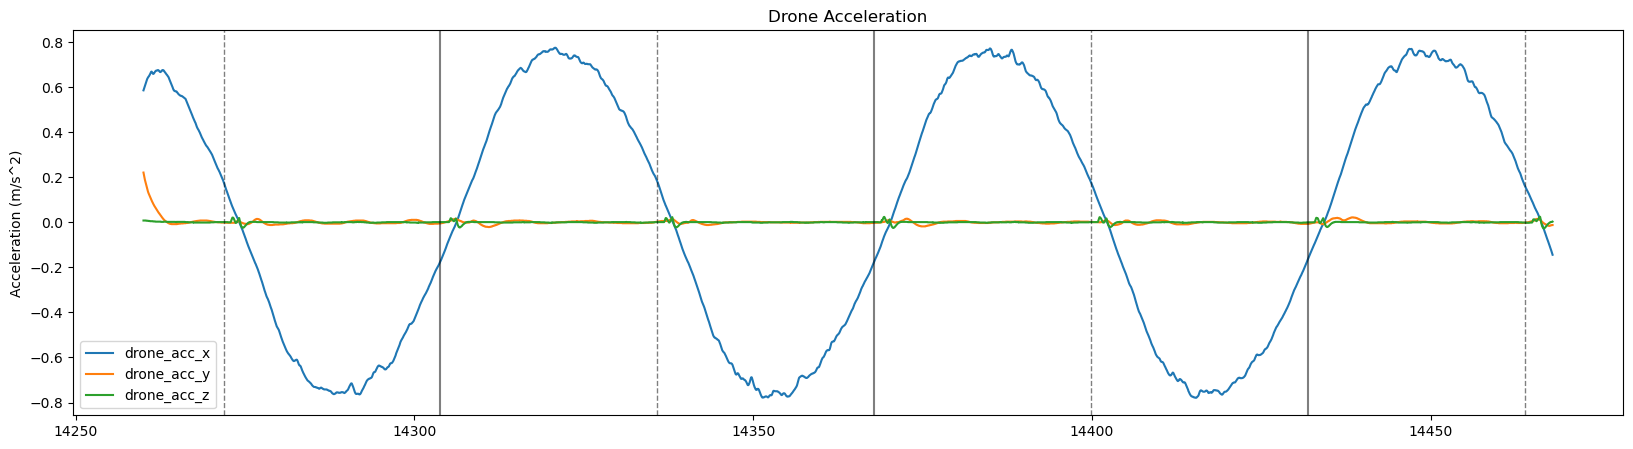

In [1098]:
# plot drone acceleration
df_gzstate['drone_acc_x'].plot(figsize=(20,5))
df_gzstate['drone_acc_y'].plot(figsize=(20,5))
df_gzstate['drone_acc_z'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Drone Acceleration')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['drone_acc_x', 'drone_acc_y', 'drone_acc_z']);

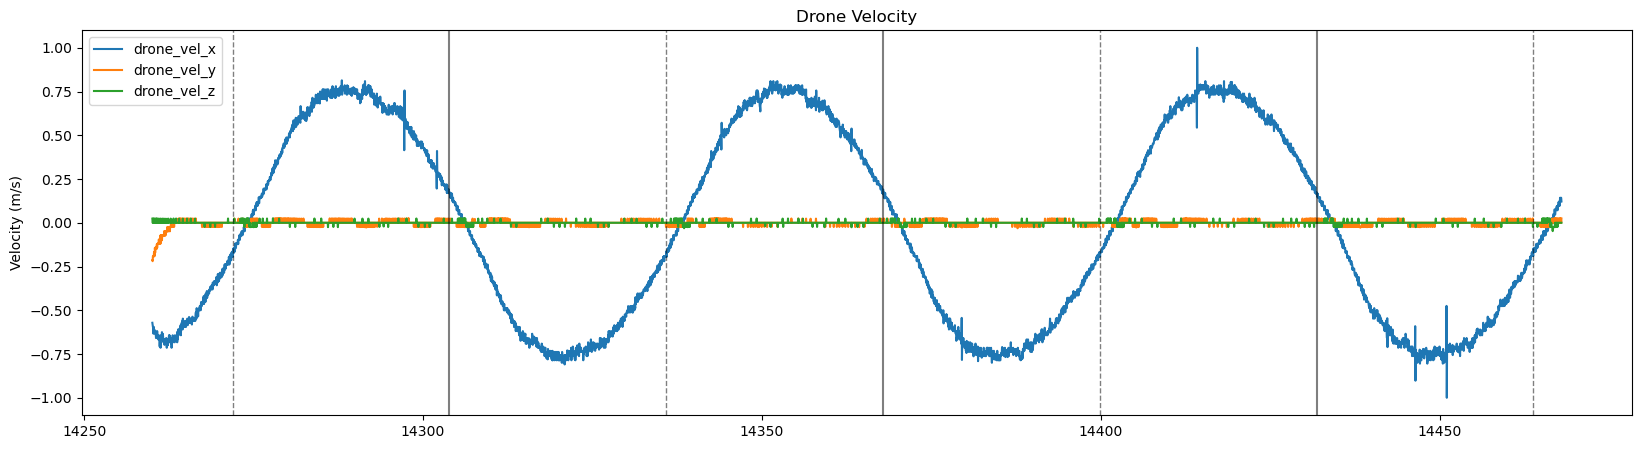

In [1099]:
# plot drone velocity
df_gzstate['drone_vel_x'].plot(figsize=(20,5))
df_gzstate['drone_vel_y'].plot(figsize=(20,5))
df_gzstate['drone_vel_z'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Drone Velocity')
plt.ylabel('Velocity (m/s)')
plt.legend(['drone_vel_x', 'drone_vel_y', 'drone_vel_z']);

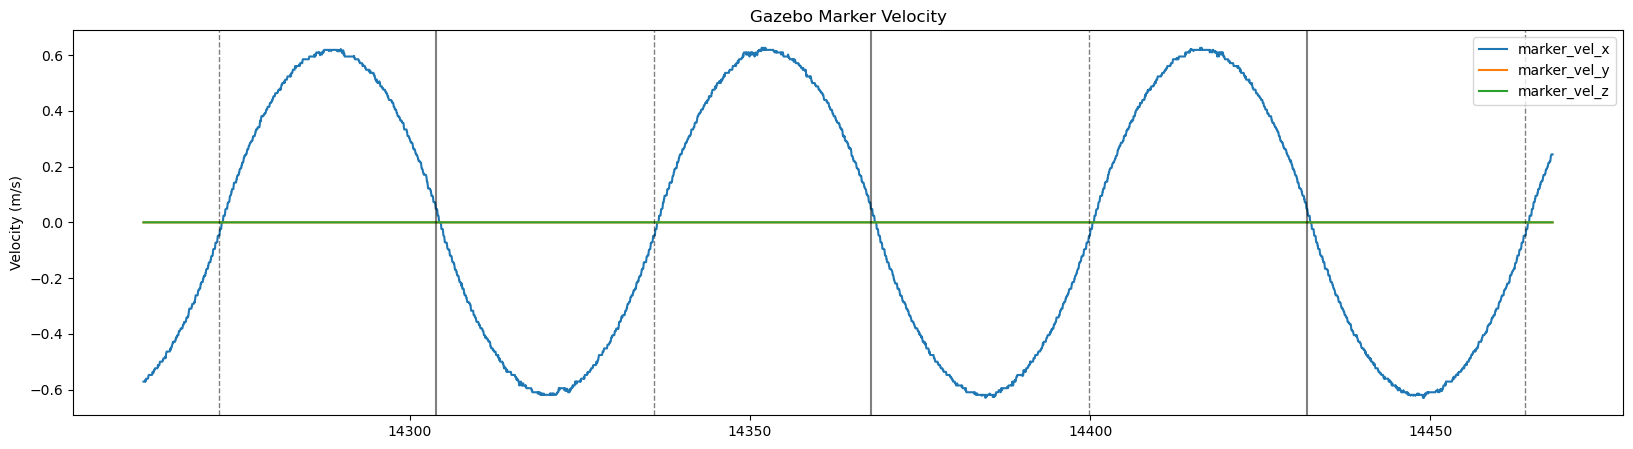

In [1100]:
# plot marker velocity
df_gzstate['marker_vel_x'].rolling(20).median().plot(figsize=(20,5))
df_gzstate['marker_vel_y'].rolling(20).median().plot(figsize=(20,5))
df_gzstate['marker_vel_z'].rolling(20).median().plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Gazebo Marker Velocity')
plt.ylabel('Velocity (m/s)')
plt.legend(['marker_vel_x', 'marker_vel_y', 'marker_vel_z']);

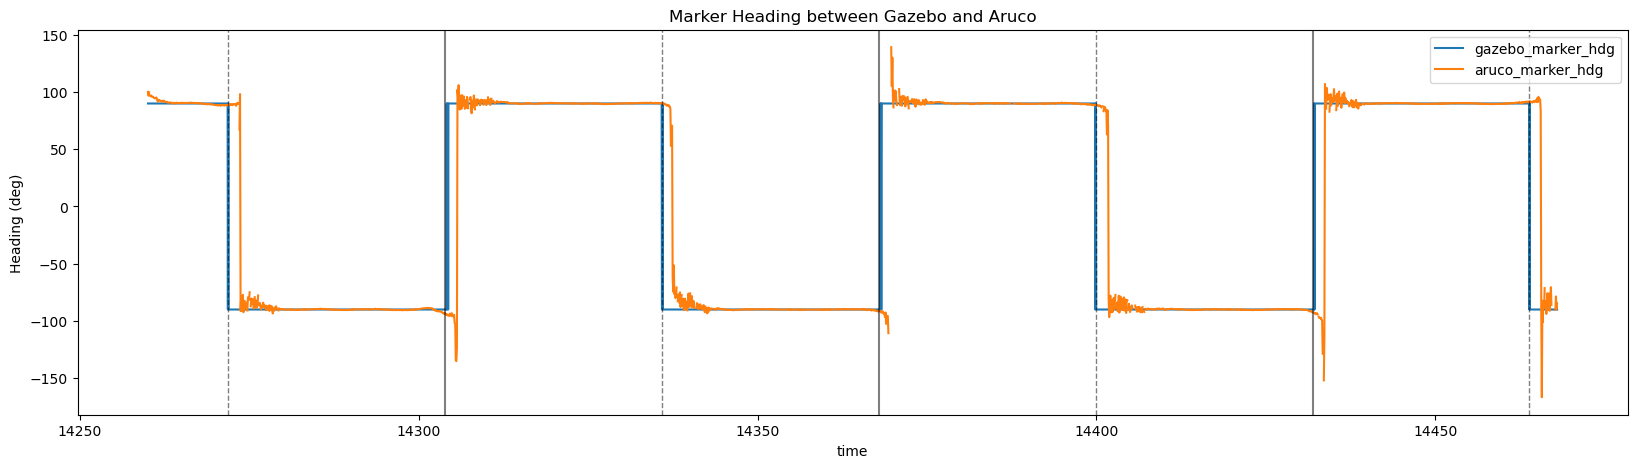

In [1101]:
# Marker Heading between Gazebo and Aruco
df_gzstate['marker_hdg'].plot(figsize=(20,5))
iris_data['marker_hdg'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_hdg', 'aruco_marker_hdg'])
plt.title('Marker Heading between Gazebo and Aruco')
plt.ylabel('Heading (deg)');

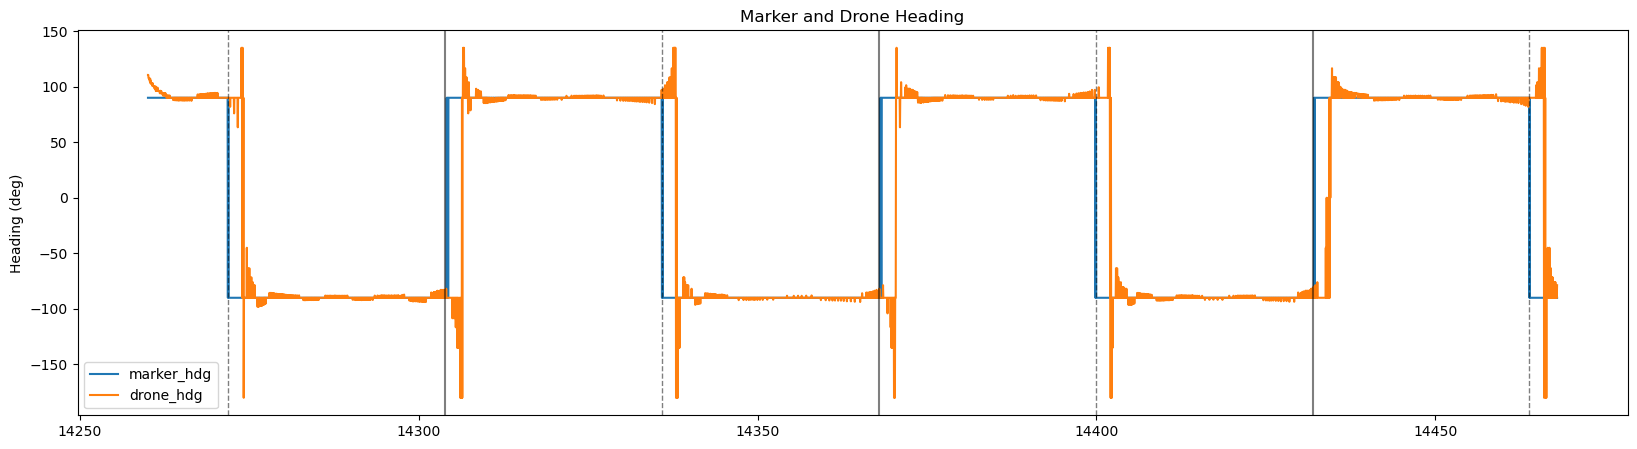

In [1102]:
# plot marker and drone heading
df_gzstate['marker_hdg'].plot(figsize=(20,5))
df_gzstate['drone_hdg'].plot(figsize=(20,5))

draw_turnpoint_lines()
plt.title('Marker and Drone Heading')
plt.ylabel('Heading (deg)')
plt.legend(['marker_hdg', 'drone_hdg']);

Text(0, 0.5, 'X Position (m)')

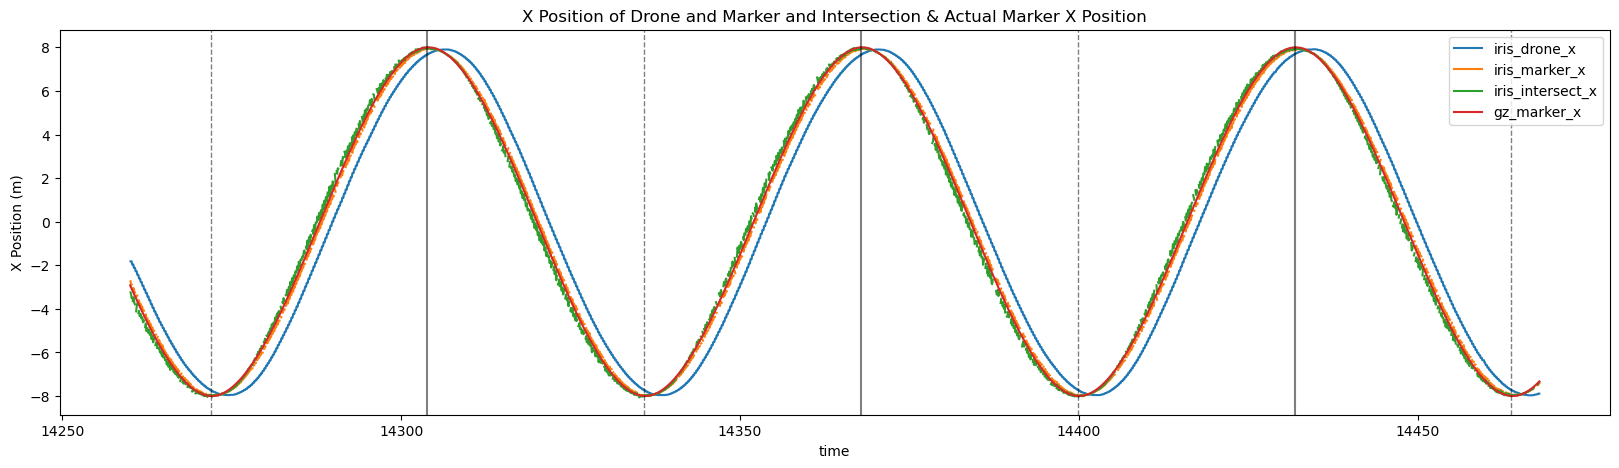

In [1103]:
# plot Drone_State_1 and Marker_State_1 together over time
iris_data[[
    'drone_x', 
    'marker_x', 
    'intersect_x'
]].plot(figsize=(20,5))
df_gzstate['marker_x'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend([
    'iris_drone_x', 
    'iris_marker_x', 
    'iris_intersect_x', 
    'gz_marker_x',
])
plt.title('X Position of Drone and Marker and Intersection & Actual Marker X Position')
plt.ylabel('X Position (m)')

Text(0, 0.5, 'Y Position (m)')

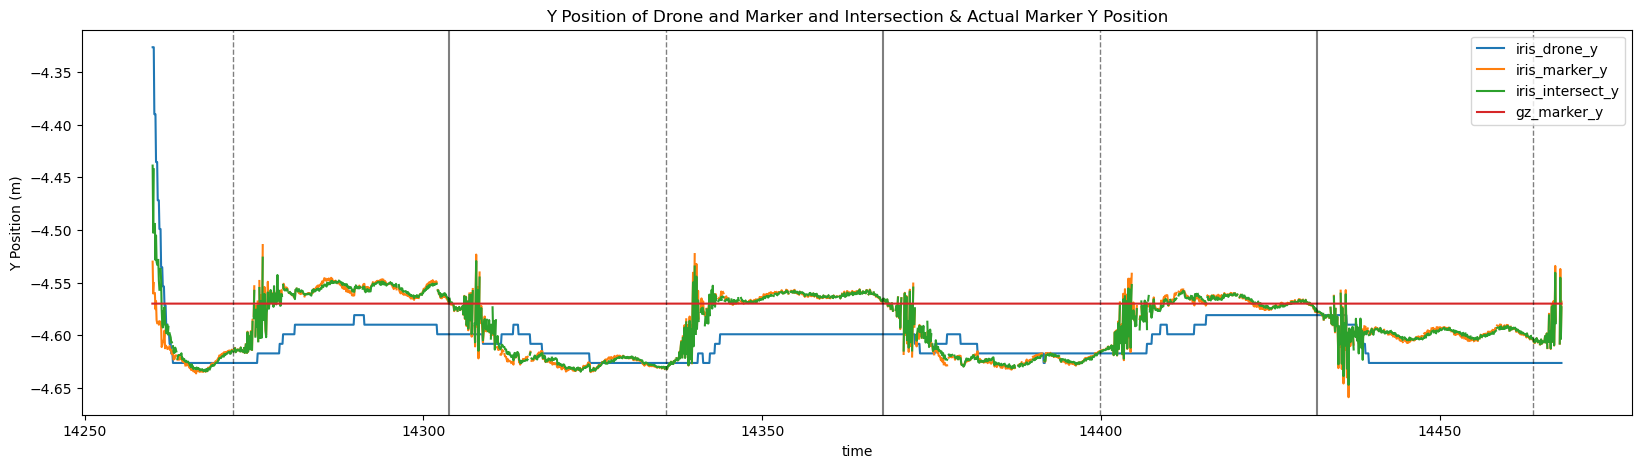

In [1104]:
# plot Drone_State_1 and Marker_State_1 together over time
iris_data[[
    'drone_y', 
    'marker_y', 
    'intersect_y'
]].plot(figsize=(20,5))
df_gzstate['marker_y'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend([
    'iris_drone_y', 
    'iris_marker_y', 
    'iris_intersect_y', 
    'gz_marker_y',
])
plt.title('Y Position of Drone and Marker and Intersection & Actual Marker Y Position')
plt.ylabel('Y Position (m)')

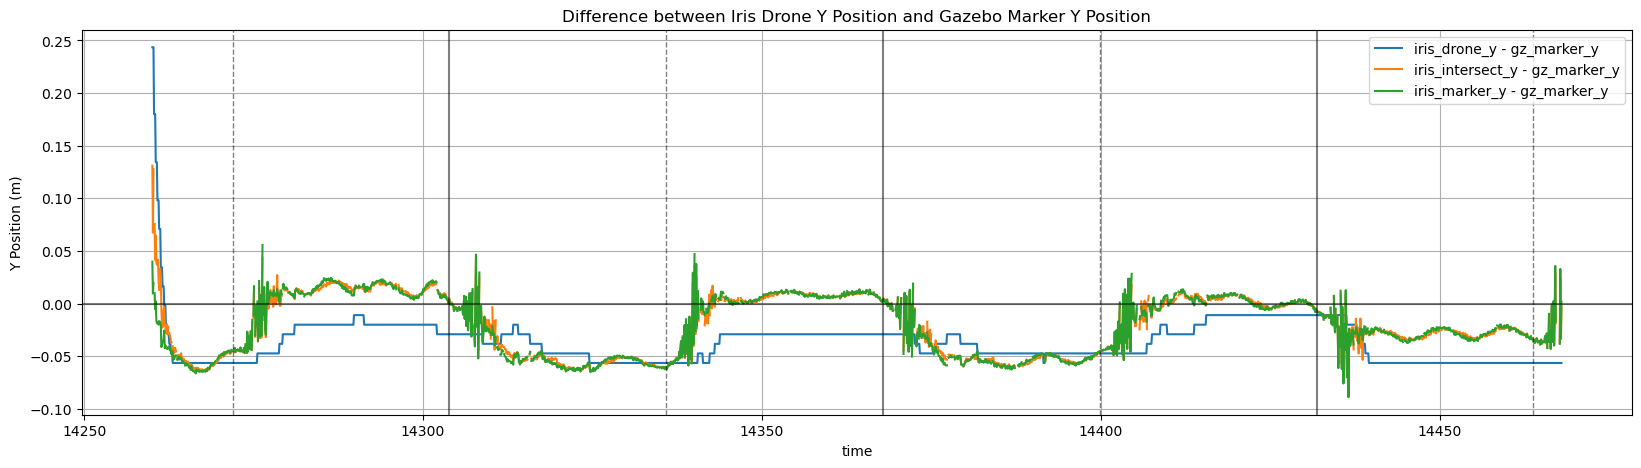

In [1105]:
# plot differences between iris_drone_y and gz_marker_y, and iris_intersect_y and gz_marker_y
(iris_data['drone_y'] - df_gzstate['marker_y'].reindex(iris_data.index, method='nearest')).plot(figsize=(20,5))
(iris_data['intersect_y'] - df_gzstate['marker_y'].reindex(iris_data.index, method='nearest')).plot(figsize=(20,5))
(iris_data['marker_y'] - df_gzstate['marker_y'].reindex(iris_data.index, method='nearest')).plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend([
    'iris_drone_y - gz_marker_y', 
    'iris_intersect_y - gz_marker_y',
    'iris_marker_y - gz_marker_y',
])
plt.grid()
plt.title('Difference between Iris Drone Y Position and Gazebo Marker Y Position')
plt.ylabel('Y Position (m)')
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)

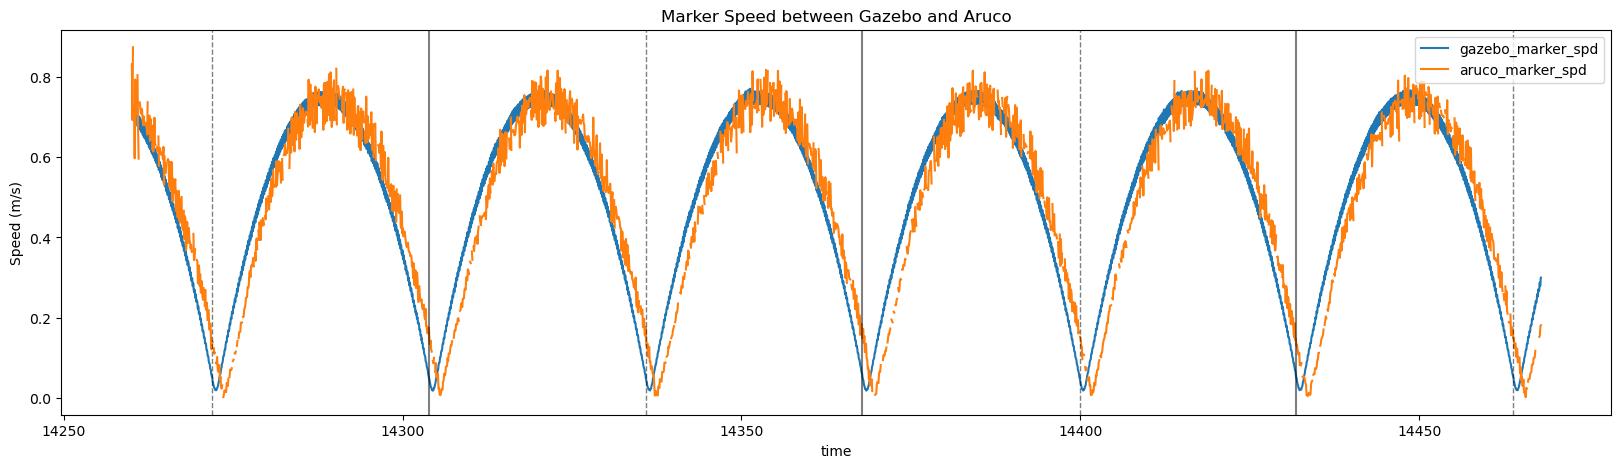

In [1106]:
# plot the speed of marker between gazebo and aruco
df_gzstate['marker_spd'].rolling(20).mean().plot(figsize=(20,5))
iris_data['marker_spd'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_marker_spd', 'aruco_marker_spd'])
plt.title('Marker Speed between Gazebo and Aruco')
plt.ylabel('Speed (m/s)');


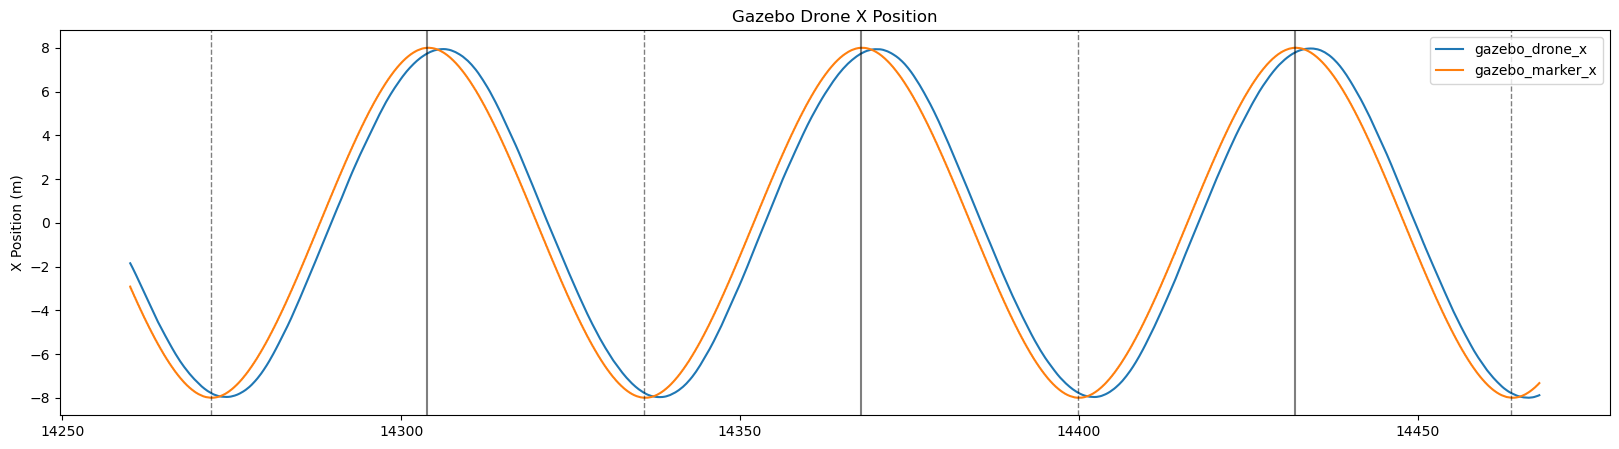

In [1107]:
# plot gazebo drone x and gazebo marker x
df_gzstate['drone_x'].plot(figsize=(20,5))
df_gzstate['marker_x'].plot(figsize=(20,5))
draw_turnpoint_lines()
plt.legend(['gazebo_drone_x', 'gazebo_marker_x'])
plt.title('Gazebo Drone X Position')
plt.ylabel('X Position (m)');


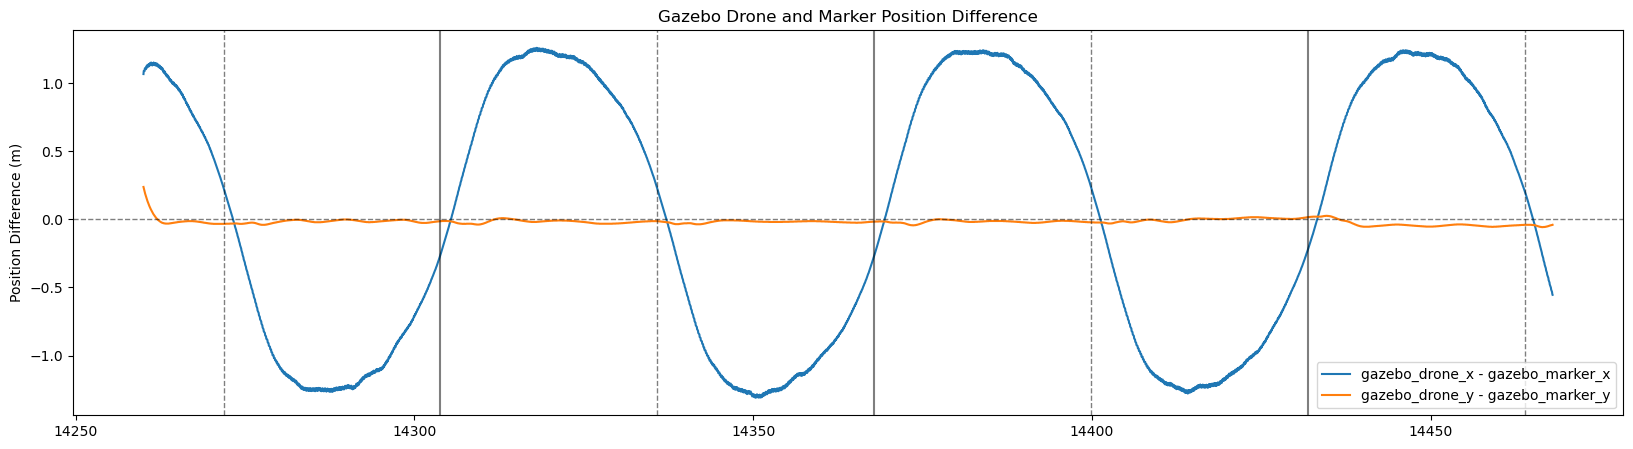

In [1108]:
# plot gazebo drone x - gazebo marker x, and gazebo drone y - gazebo marker y
(df_gzstate['drone_x'] - df_gzstate['marker_x']).plot(figsize=(20,5))
(df_gzstate['drone_y'] - df_gzstate['marker_y']).plot(figsize=(20,5))
draw_turnpoint_lines()
# draw a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.legend(['gazebo_drone_x - gazebo_marker_x', 'gazebo_drone_y - gazebo_marker_y'])
plt.title('Gazebo Drone and Marker Position Difference')
plt.ylabel('Position Difference (m)');

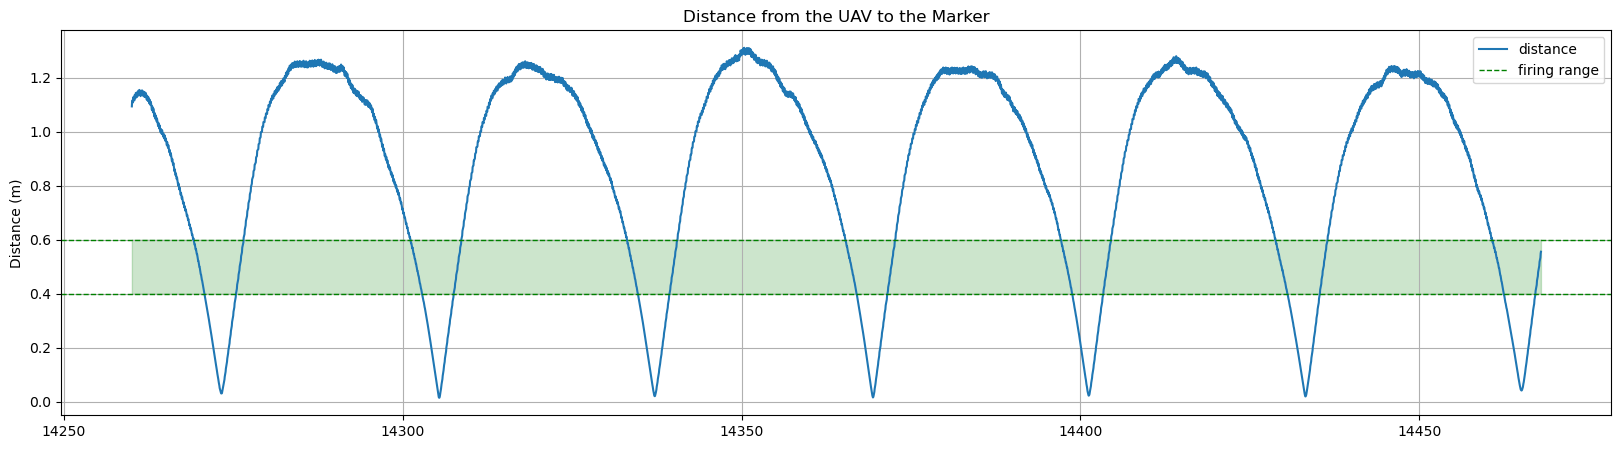

In [1109]:
# plot distance from gazebo drone to gazebo marker
(((df_gzstate['drone_x'] - df_gzstate['marker_x'])**2 + (df_gzstate['drone_y'] - df_gzstate['marker_y'])**2)**0.5).plot(figsize=(20,5))

# draw a green line at 0.6m
plt.axhline(0.6, color='green', linestyle='--', linewidth=1, alpha=1)
plt.axhline(0.4, color='green', linestyle='--', linewidth=1, alpha=1)

# color the area below the green line
plt.fill_between(df_gzstate.index, 0.4, 0.6, color='green', alpha=0.2)

plt.grid()
plt.legend(['distance', 'firing range'])
plt.title('Distance from the UAV to the Marker')
plt.ylabel('Distance (m)');

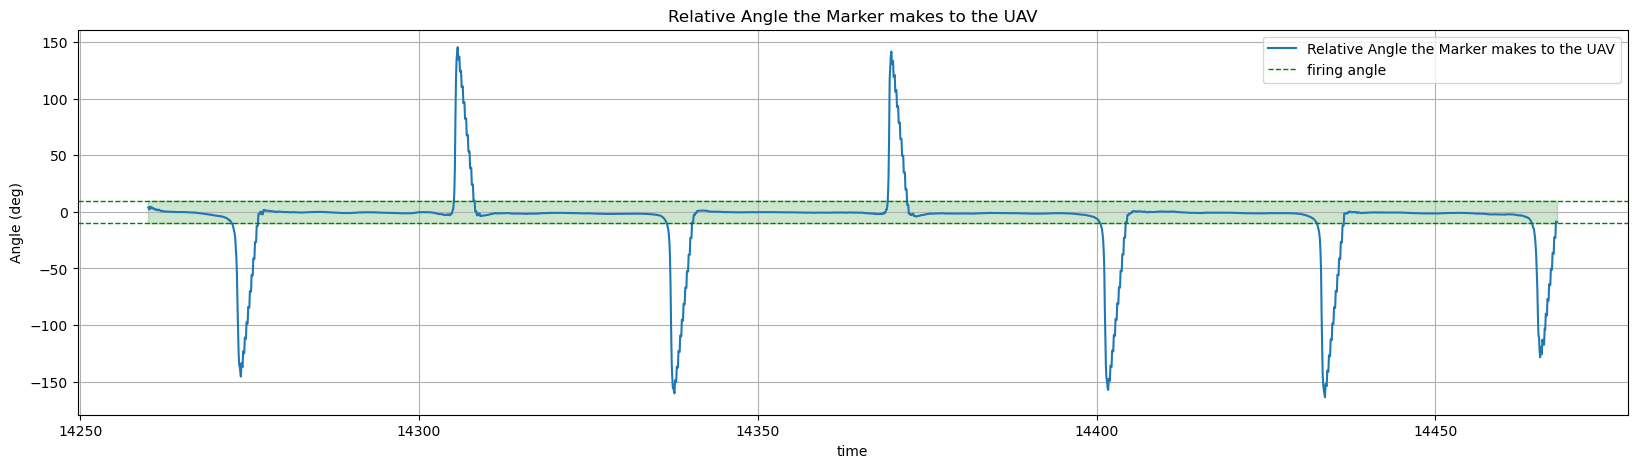

In [1110]:
# using gazebo drone x and y, gazebo marker x and y, calculate the angle between the gazebo drone and gazebo marker, in degrees
# angle = arctan((gazebo_marker_y - gazebo_drone_y) / (gazebo_marker_x - gazebo_drone_x))
# make sure the degrees are between -180 and 180
angle = np.degrees(np.arctan2(df_gzstate['marker_y'] - df_gzstate['drone_y'], df_gzstate['marker_x'] - df_gzstate['drone_x']))
angle = (angle + 180) % 360 - 180

# plot difference between angle and iris drone yaw
# need to reindex angle to match the index of iris_data
new_angle = angle.reindex(iris_data.index, method='nearest')
(((new_angle + HEADING_OFFSET) - iris_data['drone_yaw'] + 180) % 360 - 180).plot(figsize=(20,5))

# draw a green line at 10 and -10 degrees
plt.axhline(10, color='green', linestyle='--', linewidth=1, alpha=1)
plt.axhline(-10, color='green', linestyle='--', linewidth=1, alpha=1)

# color the area below the green line
plt.fill_between(df_gzstate.index, -10, 10, color='green', alpha=0.2)

plt.legend(['Relative Angle the Marker makes to the UAV','firing angle'])

plt.title('Relative Angle the Marker makes to the UAV')
plt.grid()
plt.ylabel('Angle (deg)');

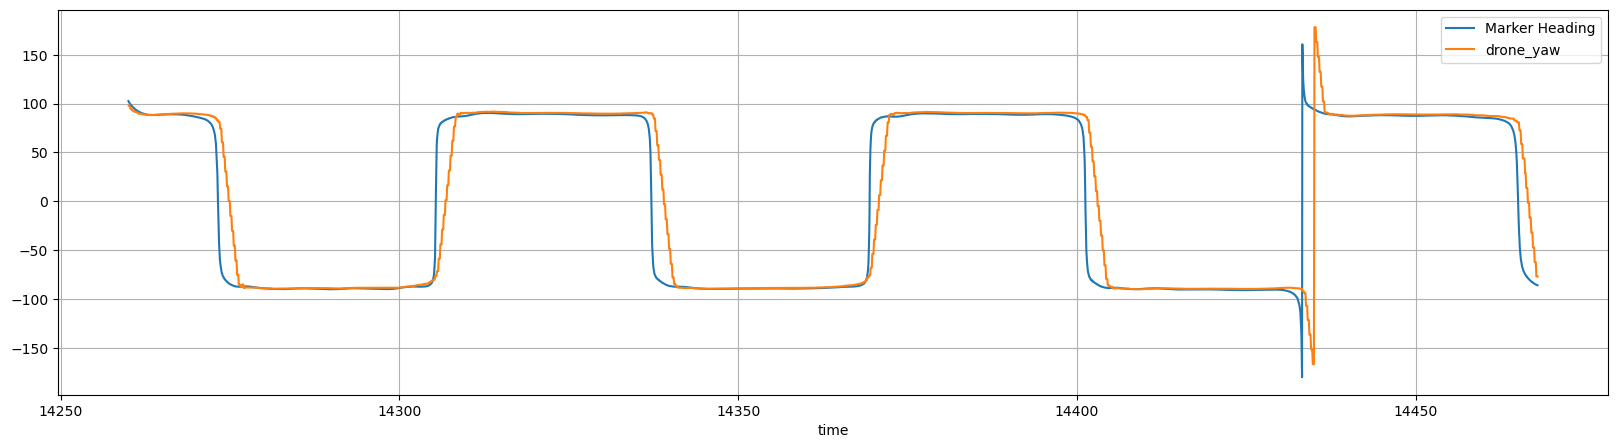

In [1113]:
# using gazebo drone x and y, gazebo marker x and y, calculate the angle between the gazebo drone and gazebo marker, in degrees
# angle = arctan((gazebo_marker_y - gazebo_drone_y) / (gazebo_marker_x - gazebo_drone_x))
# make sure the degrees are between -180 and 180
angle = np.degrees(np.arctan2(df_gzstate['marker_y'] - df_gzstate['drone_y'], df_gzstate['marker_x'] - df_gzstate['drone_x']))
angle = (angle + HEADING_OFFSET + 180) % 360 - 180
angle.plot(figsize=(20,5))

# plot drone yaw
iris_data['drone_yaw'].plot(figsize=(20,5))

plt.legend(['Marker Heading', 'drone_yaw'])

plt.grid()